# Анализ продаж электронных подарочных сертификатов

Необходимо проанализировать продажи электронных подарочных сертификатов для интернет-магазина подарков.
Для этого даны три выгрузки из базы данных - за февраль, март и апрель c информацией о заказах (цена, дата покупки, магазин и т.д.).<br>

## Предварительный анализ данных

In [1]:
import pandas as pd
# import datetime
from datetime import datetime, timedelta as dt
import matplotlib.pyplot as plt
#  import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
from IPython.display import display_html 

In [2]:
pd.set_option('display.float_format', '{:,.2f}'.format) # задать формат для float (2 знака после запятой)
#  display(df_sessions_grouped.style.format({'user_id_ratio':'{:.0%}'}))

In [3]:
# стиль для графиков
sns.set_theme(style='whitegrid', palette='Set2',) # deep / bright / husl / Set2 

In [4]:
def get_info(data):
    '''
    Первичные данные по таблицам.
    
    Получаем название таблицы, переименовываем колонки,
    выводим форматы данных, количество пустых значений, дубликатов и уникальных значений по столбцам.
    '''
    print(data.name.upper())
    data.columns = ['card_id', 'order_id', 'user_id', 'price', 'payment_date',
                    'receipt_date', 'store', 'buyers_email', 'recipients_email']
    print()
    data.info()
    print()
    print('Количество пропущенных значений')
    print(data.isnull().sum())
    print()
    print('Количество дубликатов строк')
    print(data.duplicated().sum())
    print()
    print('Количество уникальных значений')
    print(data.nunique())
    print()

    display(data.head())

In [5]:
def get_others_store(x):
    '''
    Меняет магазины ниже топ-5 на категорию 'Другие' 
    и объединяет все типы мультисертификатов в единую категорию 'Мультисертификаты'
    '''
    if 'мультисертификат' in x.lower():
        x = 'Мультисертификаты'
    elif x not in top5_stores:
        x = 'Другие'    
    else:
        x = x 
    return x

In [6]:
def set_title(df):
    '''
    Устанавливает стиль для заголовка таблицы.
    
    Требуется предварительно задать переменные:
    title - заголовок таблицы,
    col - название колонки для сортировки
    '''
    (display(df.sort_values(by=f'{col}', ascending=False)
     .reset_index()
     .drop('index', axis=1)
     .style.set_caption(f'{title}')
     .set_table_styles([{
         'selector': 'caption',
         'props': [
             ('color', 'black'),
             ('font-size', '16px')
         ]
     }])
     .format({f'{float_col}':'{:,.2f}'})
    ))

In [7]:
august = pd.read_excel('../projects/august.xlsx') # parse_dates=True
august.name = 'august'

In [8]:
september = pd.read_excel('../projects/september.xlsx')
september.name = 'september'

In [9]:
october = pd.read_excel('../projects/october.xlsx')
october.name = 'october'

In [10]:
get_info(august)

AUGUST

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   card_id           424 non-null    int64         
 1   order_id          424 non-null    int64         
 2   user_id           424 non-null    int64         
 3   price             424 non-null    int64         
 4   payment_date      424 non-null    datetime64[ns]
 5   receipt_date      424 non-null    datetime64[ns]
 6   store             424 non-null    object        
 7   buyers_email      424 non-null    object        
 8   recipients_email  424 non-null    object        
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 29.9+ KB

Количество пропущенных значений
card_id             0
order_id            0
user_id             0
price               0
payment_date        0
receipt_date        0
store               0
buyers_email        0
recipients_emai

,card_id,order_id,user_id,price,payment_date,receipt_date,store,buyers_email,recipients_email
0,1,100,343,4000,2022-08-01 12:00:35,2022-08-01 12:01:03,Мультисертификат,qWRdaqdWE001@mail.ru,cdKH125adsjkld585@mail.ru
1,2,200,457,4000,2022-08-01 12:02:23,2022-08-01 12:03:02,Мультисертификат детский,qWRdaqdWE002@yandex.ru,cdKH125adsjkld1042@yandex.ru
2,3,300,281,6000,2022-08-01 12:34:38,2022-08-01 13:01:03,Тайский массаж,qWRdaqdWE003@gmail.com,cdKH125adsjkld142@gmail.com
3,4,400,760,4000,2022-08-01 15:10:45,2022-08-01 15:11:02,Детский Мир,qWRdaqdWE004@gmail.com,cdKH125adsjkld143@bk.ru
4,5,500,684,6000,2022-08-01 15:21:43,2022-08-01 15:23:02,Детский Мир,qWRdaqdWE005@gmail.com,cdKH125adsjkld144@mail.ru


In [11]:
get_info(september)

SEPTEMBER

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   card_id           479 non-null    int64         
 1   order_id          479 non-null    int64         
 2   user_id           479 non-null    int64         
 3   price             479 non-null    int64         
 4   payment_date      479 non-null    datetime64[ns]
 5   receipt_date      479 non-null    datetime64[ns]
 6   store             479 non-null    object        
 7   buyers_email      479 non-null    object        
 8   recipients_email  479 non-null    object        
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 33.8+ KB

Количество пропущенных значений
card_id             0
order_id            0
user_id             0
price               0
payment_date        0
receipt_date        0
store               0
buyers_email        0
recipients_e

,card_id,order_id,user_id,price,payment_date,receipt_date,store,buyers_email,recipients_email
0,425,42500,610,6000,2022-09-01 10:16:12,2022-09-01 10:17:02,Мультисертификат,qWRdaqdWE425@yandex.ru,cdKH125adsjkld1128@gmail.com
1,426,42600,152,2500,2022-09-01 11:26:04,2022-09-01 11:27:02,Мультисертификат,qWRdaqdWE426@mail.ru,cdKH125adsjkld699@yandex.ru
2,427,42700,464,4000,2022-09-01 13:50:27,2022-09-01 13:51:02,Мультисертификат,qWRdaqdWE427@mail.ru,cdKH125adsjkld700@gmail.com
3,428,42800,737,4000,2022-09-02 09:12:36,2022-09-02 09:14:01,Мультисертификат,qWRdaqdWE428@sys.ru,cdKH125adsjkld1000@sys.ru
4,429,42900,502,2000,2022-09-02 11:59:00,2022-09-02 12:00:04,Детский Мир,qWRdaqdWE429@mail.ru,cdKH125adsjkld701@mail.ru


In [12]:
get_info(october)

OCTOBER

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   card_id           369 non-null    int64         
 1   order_id          369 non-null    int64         
 2   user_id           369 non-null    int64         
 3   price             369 non-null    int64         
 4   payment_date      369 non-null    datetime64[ns]
 5   receipt_date      367 non-null    datetime64[ns]
 6   store             369 non-null    object        
 7   buyers_email      369 non-null    object        
 8   recipients_email  369 non-null    object        
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 26.1+ KB

Количество пропущенных значений
card_id             0
order_id            0
user_id             0
price               0
payment_date        0
receipt_date        2
store               0
buyers_email        0
recipients_ema

,card_id,order_id,user_id,price,payment_date,receipt_date,store,buyers_email,recipients_email
0,904,90400,454,15000,2022-10-01 10:33:50,2022-10-01 10:34:01,Мультисертификат,qWRdaqdWE904@gmail.com,cdKH125adsjkld389@datas.com
1,905,90500,131,2500,2022-10-01 10:34:04,2022-10-01 10:36:02,Рив Гош,qWRdaqdWE905@mail.ru,cdKH125adsjkld820@gmail.com
2,906,90600,250,6000,2022-10-01 10:51:41,2022-10-01 20:00:03,Вотоня,qWRdaqdWE906@gmail.com,cdKH125adsjkld390@gmail.com
3,907,90700,745,500,2022-10-01 10:52:18,2022-10-01 10:54:02,Мультисертификат,qWRdaqdWE907@gmail.com,cdKH125adsjkld391@gmail.com
4,908,90800,117,4240,2022-10-01 11:10:09,2022-10-01 11:12:01,Магазин чая,qWRdaqdWE908@gmail.com,cdKH125adsjkld392@mail.ru


Проверим и удалим строки, в которых есть пропуски. Таких строк всего две, их наличие не повлияет на анализ, но поможет избежать ошибок, связанных с неполными данными.

In [13]:
october.shape

(369, 9)

In [14]:
october.dropna(subset=['receipt_date'], inplace=True)

In [15]:
october.shape

(367, 9)

In [16]:
october.isnull().sum()

card_id             0
order_id            0
user_id             0
price               0
payment_date        0
receipt_date        0
store               0
buyers_email        0
recipients_email    0
dtype: int64

In [17]:
# october[october['receipt_date'].isnull()]

Объединим данные за 3 месяца и поправим форматы данных.

In [18]:
df = pd.concat([august, september, october], ignore_index=True)
df.head()

,card_id,order_id,user_id,price,payment_date,receipt_date,store,buyers_email,recipients_email
0,1,100,343,4000,2022-08-01 12:00:35,2022-08-01 12:01:03,Мультисертификат,qWRdaqdWE001@mail.ru,cdKH125adsjkld585@mail.ru
1,2,200,457,4000,2022-08-01 12:02:23,2022-08-01 12:03:02,Мультисертификат детский,qWRdaqdWE002@yandex.ru,cdKH125adsjkld1042@yandex.ru
2,3,300,281,6000,2022-08-01 12:34:38,2022-08-01 13:01:03,Тайский массаж,qWRdaqdWE003@gmail.com,cdKH125adsjkld142@gmail.com
3,4,400,760,4000,2022-08-01 15:10:45,2022-08-01 15:11:02,Детский Мир,qWRdaqdWE004@gmail.com,cdKH125adsjkld143@bk.ru
4,5,500,684,6000,2022-08-01 15:21:43,2022-08-01 15:23:02,Детский Мир,qWRdaqdWE005@gmail.com,cdKH125adsjkld144@mail.ru


In [19]:
df['payment_dt'] = df['payment_date'].astype('datetime64[D]')
#df['payment_dt_month'] = df['payment_date'].dt.strftime('%b %Y') #.astype('datetime64[M]')
df['payment_dt_month'] = df['payment_date'].dt.to_period('M')
df.head()

,card_id,order_id,user_id,price,payment_date,receipt_date,store,buyers_email,recipients_email,payment_dt,payment_dt_month
0,1,100,343,4000,2022-08-01 12:00:35,2022-08-01 12:01:03,Мультисертификат,qWRdaqdWE001@mail.ru,cdKH125adsjkld585@mail.ru,2022-08-01,2022-08
1,2,200,457,4000,2022-08-01 12:02:23,2022-08-01 12:03:02,Мультисертификат детский,qWRdaqdWE002@yandex.ru,cdKH125adsjkld1042@yandex.ru,2022-08-01,2022-08
2,3,300,281,6000,2022-08-01 12:34:38,2022-08-01 13:01:03,Тайский массаж,qWRdaqdWE003@gmail.com,cdKH125adsjkld142@gmail.com,2022-08-01,2022-08
3,4,400,760,4000,2022-08-01 15:10:45,2022-08-01 15:11:02,Детский Мир,qWRdaqdWE004@gmail.com,cdKH125adsjkld143@bk.ru,2022-08-01,2022-08
4,5,500,684,6000,2022-08-01 15:21:43,2022-08-01 15:23:02,Детский Мир,qWRdaqdWE005@gmail.com,cdKH125adsjkld144@mail.ru,2022-08-01,2022-08


In [20]:
df.shape

(1270, 11)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   card_id           1270 non-null   int64         
 1   order_id          1270 non-null   int64         
 2   user_id           1270 non-null   int64         
 3   price             1270 non-null   int64         
 4   payment_date      1270 non-null   datetime64[ns]
 5   receipt_date      1270 non-null   datetime64[ns]
 6   store             1270 non-null   object        
 7   buyers_email      1270 non-null   object        
 8   recipients_email  1270 non-null   object        
 9   payment_dt        1270 non-null   datetime64[ns]
 10  payment_dt_month  1270 non-null   period[M]     
dtypes: datetime64[ns](3), int64(4), object(3), period[M](1)
memory usage: 109.3+ KB


In [22]:
df[['card_id', 'order_id', 'user_id']] = df[['card_id', 'order_id', 'user_id']].astype(str)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   card_id           1270 non-null   object        
 1   order_id          1270 non-null   object        
 2   user_id           1270 non-null   object        
 3   price             1270 non-null   int64         
 4   payment_date      1270 non-null   datetime64[ns]
 5   receipt_date      1270 non-null   datetime64[ns]
 6   store             1270 non-null   object        
 7   buyers_email      1270 non-null   object        
 8   recipients_email  1270 non-null   object        
 9   payment_dt        1270 non-null   datetime64[ns]
 10  payment_dt_month  1270 non-null   period[M]     
dtypes: datetime64[ns](3), int64(1), object(6), period[M](1)
memory usage: 109.3+ KB


**Вывод**

За счет объединения таблиц с данными по месяцам, сформирована общая таблица `df` для дальнейшего анализа.<br>
В столбцах `card_id` и `order_id` содержатся уникальные значения. Количество пользователей (`user_id`) меньше количества заказов, следовательно часть пользователей делали повторные заказы в течение одного месяца. Больше всего заказов было совершено в сентябре.<br>

Полные дубликаты отсутствуют.<br>
Присутствуют 2 пропуска в стобце `receipt_date` из таблицы `oktober`. Пропуски удалены, чтобы не мешать дальнейшему анализу.

Для трех таблиц - `august`, `september`, `oktober` - названия столбцов переведены с кириллицы на латиницу, с целью исключения возможных конфликтов, связанных с языком. <br>
Для корректной работы, скорректированы форматы данных: `card_id`, `order_id`, `user_id` - переведены из int в str.

## Анализ продаж

In [24]:
df.head()

,card_id,order_id,user_id,price,payment_date,receipt_date,store,buyers_email,recipients_email,payment_dt,payment_dt_month
0,1,100,343,4000,2022-08-01 12:00:35,2022-08-01 12:01:03,Мультисертификат,qWRdaqdWE001@mail.ru,cdKH125adsjkld585@mail.ru,2022-08-01,2022-08
1,2,200,457,4000,2022-08-01 12:02:23,2022-08-01 12:03:02,Мультисертификат детский,qWRdaqdWE002@yandex.ru,cdKH125adsjkld1042@yandex.ru,2022-08-01,2022-08
2,3,300,281,6000,2022-08-01 12:34:38,2022-08-01 13:01:03,Тайский массаж,qWRdaqdWE003@gmail.com,cdKH125adsjkld142@gmail.com,2022-08-01,2022-08
3,4,400,760,4000,2022-08-01 15:10:45,2022-08-01 15:11:02,Детский Мир,qWRdaqdWE004@gmail.com,cdKH125adsjkld143@bk.ru,2022-08-01,2022-08
4,5,500,684,6000,2022-08-01 15:21:43,2022-08-01 15:23:02,Детский Мир,qWRdaqdWE005@gmail.com,cdKH125adsjkld144@mail.ru,2022-08-01,2022-08


### Выручка

In [25]:
# выручка за 3 мес
df['price'].sum()

5390333

In [26]:
amount_dt = df.groupby('payment_dt', as_index=False).agg(amount = ('price', 'sum')).assign(median_amount = lambda x: x['amount'].median())
amount_month = df.groupby('payment_dt_month', as_index=False).agg(amount = ('price', 'sum')).assign(median_amount = lambda x: x['amount'].median())
#amount_month 

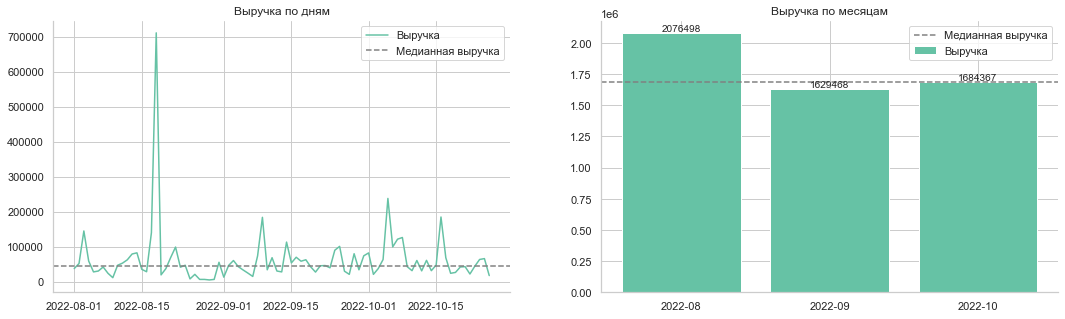

,payment_dt,amount,median_amount
27,2022-08-28,6000,"43,500.00"
38,2022-09-08,73300,"43,500.00"
44,2022-09-14,112700,"43,500.00"
,payment_dt_month,amount,median_amount
0,2022-08,2076498,"1,684,367.00"
1,2022-09,1629468,"1,684,367.00"
2,2022-10,1684367,"1,684,367.00"


In [89]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5))
ax1.plot(amount_dt['payment_dt'], amount_dt['amount'], label='Выручка')
ax1.axhline(amount_dt['amount'].median(), color='grey', ls='--', label='Медианная выручка')
ax1.legend()
ax1.set_title('Выручка по дням')

ax2.bar(amount_month['payment_dt_month'].astype('str'), amount_month['amount'], label='Выручка')
ax2.axhline(amount_month['amount'].median(), color='grey', ls='--', label='Медианная выручка')
# Подписываем горизонтальную линию
# ax2.annotate('Медиана', xy=(-0.5, amount_month['amount'].median()+500000), color='grey') 
ax2.legend()
ax2.set_title('Выручка по месяцам')
for i in range(len(amount_month['payment_dt_month'])):
    ax2.text(i, amount_month['amount'][i], amount_month['amount'][i], ha='center', va='bottom', size=10)
    
sns.despine()
plt.show()

# стили для таблиц side by side
# amount_dt
# amount_month
amount_dt_styler = (amount_dt.sample(3, random_state=1).sort_values(by='payment_dt')
                     .style.set_table_attributes("style='display:inline'")
                     .set_caption('Выручка по дням (3 рандомных дня)')
                     .format({'payment_dt': "{:%Y-%m-%d}"}) # формат дат
                     .format({'median_amount': "{:,.2f}"})
                    )
amount_month_styler = amount_month.style.set_table_attributes("style='display:inline'").set_caption('Выручка по месяцам').format({'median_amount': "{:,.2f}"})
space = "\xa0" * 50
display_html(amount_dt_styler._repr_html_() + space + amount_month_styler._repr_html_(), raw=True)

Выручка нестабильна, наблюдается несколько пиков - в первой половине сентября, начале и середине октябя, и самый большой - в середине августа. Медианная выручка по дням - 43 500 р. <br>
Медианная выручка по месяцам - почти 1,7 млн р. Больше всего заработали в августе - 2 076 498 р., меньше всего - в сентябре - 1 629 468 р.

### Количество покупателей

In [28]:
df['user_id'].nunique()

769

In [29]:
# таблицы для графиков и вывода под графиками
users_days = df.groupby('payment_dt', as_index=False).agg(users_count = ('user_id','nunique')).assign(users_count_avg = lambda x: x['users_count'].mean()) #.sample(5).sort_values(by='payment_dt')
users_months = df.groupby('payment_dt_month', as_index=False).agg(users_count = ('user_id', 'nunique')).assign(users_count_avg = lambda x: x['users_count'].mean())
# users_months

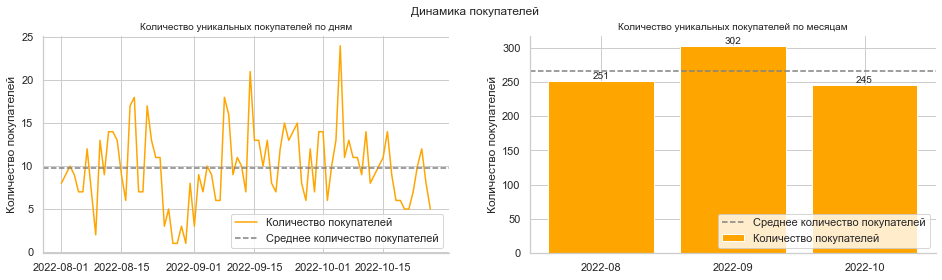

,payment_dt,users_count,users_count_avg
27,2022-08-28,1,9.83
38,2022-09-08,18,9.83
44,2022-09-14,21,9.83
,payment_dt_month,users_count,users_count_avg
0,2022-08,251,266.00
1,2022-09,302,266.00
2,2022-10,245,266.00


In [30]:
# matplotlib графики 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
# lineplot
ax1.plot(users_days['payment_dt'], users_days['users_count'], color='orange', label='Количество покупателей')
ax1.set_xlabel('')
ax1.set_ylabel('Количество покупателей')
ax1.set_title('Количество уникальных покупателей по дням', size=10)
ax1.axhline(users_days['users_count'].mean(), color='grey', ls='--', label='Среднее количество покупателей')
ax1.legend()

# barplot
ax2.bar(users_months['payment_dt_month'].astype('str'), users_months['users_count'], color='orange', label='Количество покупателей') # kind='bar', legend=False, ax=ax2, 
ax2.set_xlabel('')
ax2.set_ylabel('Количество покупателей')
ax2.set_xticks(users_months.payment_dt_month.astype('str')) # иначе не заработает ax2.set_xticklabels
ax2.set_xticklabels(users_months.payment_dt_month, rotation=0)
ax2.set_title('Количество уникальных покупателей по месяцам', size=10)
ax2.axhline(users_months['users_count'].mean(), color='grey', ls='--', label='Среднее количество покупателей')
ax2.legend(loc='lower right')
# подписи столбцов
for i in range(len(users_months.payment_dt_month)):
    (ax2.text(i, users_months.users_count[i], 
              users_months.users_count[i], 
              ha = 'center', va = 'bottom', size=10)
    )

sns.despine()
plt.suptitle(f'Динамика покупателей', size=12)
plt.show()

# стили для таблиц side by side
# users_days
# users_months
users_days_styler = (users_days.sample(3, random_state=1).sort_values(by='payment_dt')
                     .style.set_table_attributes("style='display:inline'")
                     .set_caption('Покупатели по дням (3 рандомных дня)')
                     .format({'payment_dt': "{:%Y-%m-%d}"}) # формат дат
                     .format({'users_count_avg': "{:,.2f}"})
                    )
users_months_styler = users_months.style.set_table_attributes("style='display:inline'").set_caption('Покупатели по месяцам').format({'users_count_avg': "{:,.2f}"})
space = "\xa0" * 90
display_html(users_days_styler._repr_html_() + space + users_months_styler._repr_html_(), raw=True)

Динамика количества покупателей по дням неравномерна. Наблюдается спад в конце августа. И снижение покупательской активности к концу октября. <br>
Сентябрь - наиболее активный месяц.<br>
Среднее количество покупателей в день - 10, в месяц - 266.

### Количество заказов

In [31]:
df['order_id'].nunique(), df['order_id'].count()

(1270, 1270)

In [32]:
df.groupby('payment_dt').agg('order_id').count()

payment_dt
2022-08-01     8
2022-08-02     9
2022-08-03    62
2022-08-04     9
2022-08-05     8
              ..
2022-10-22     7
2022-10-23    13
2022-10-24    20
2022-10-25     9
2022-10-26     5
Name: order_id, Length: 87, dtype: int64

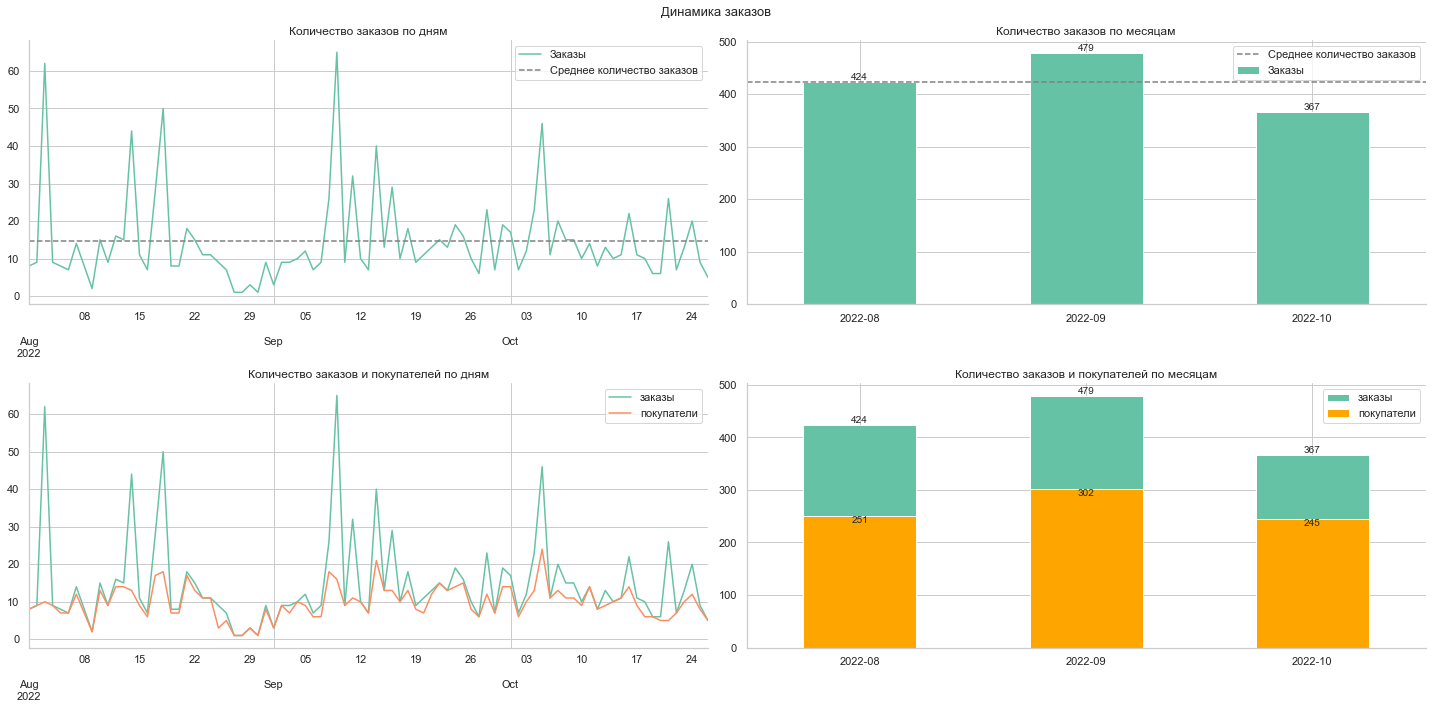

,payment_dt,users_count,orders_count,orders_count_avg
27,2022-08-28,1,1,14.60
38,2022-09-08,18,26,14.60
44,2022-09-14,21,40,14.60
,payment_dt_month,users_count,orders_count,orders_count_avg
0,2022-08,251,424,423.33
1,2022-09,302,479,423.33
2,2022-10,245,367,423.33


In [33]:
# графики pandas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
(ax1, ax2), (ax3, ax4) = axes

# заказы по дням - ax1
df.groupby('payment_dt').agg('order_id').count().plot(ax=ax1, label='Заказы')
ax1.set_xlabel('')
ax1.legend()
ax1.set_title('Количество заказов по дням')
ax1.axhline(df.groupby('payment_dt').agg('order_id').count().mean(), color='grey', ls='--', label='Среднее количество заказов')
ax1.legend()

# заказы по месяцам - ax2
df.groupby('payment_dt_month').agg('order_id').count().plot(kind='bar', ax=ax2, rot=0, label='Заказы')
ax2.set_xlabel('')
#ax2.set_xticklabels(df.groupby('payment_dt_month').agg('order_id').count().index, rotation=0)
ax2.legend()
ax2.set_title('Количество заказов по месяцам')
ax2.axhline(df.groupby('payment_dt_month').agg('order_id').count().mean(), color='grey', ls='--', label='Среднее количество заказов')
ax2.legend()
# подписи столбцов
for i in range(len(df.groupby('payment_dt_month').agg('order_id').count())):
    (ax2.text(i, df.groupby('payment_dt_month').agg('order_id').count()[i], 
              df.groupby('payment_dt_month').agg('order_id').count()[i], 
              ha = 'center', va = 'bottom', size=10)
    )

# заказы и покупатели по дням (сравнение) - ax3
df.groupby('payment_dt').agg('order_id').count().plot(ax=ax3, label='заказы')
df.groupby('payment_dt').agg('user_id').nunique().plot(ax=ax3, label='покупатели')
ax3.set_xlabel('')
ax3.legend()
ax3.set_title('Количество заказов и покупателей по дням')

# заказы и покупатели по месяцам (сравнение) - ax3
df.groupby('payment_dt_month').agg('order_id').count().plot(kind='bar', ax=ax4, label='заказы')
df.groupby('payment_dt_month').agg('user_id').nunique().plot(kind='bar', color='orange', stacked=False, rot=0, ax=ax4, label='покупатели')
ax4.set_xlabel('')
ax4.legend()
ax4.set_title('Количество заказов и покупателей по месяцам')
# подписи столбцов
for i in range(len(df.groupby('payment_dt_month').agg('order_id').count())):
    (ax4.text(i, df.groupby('payment_dt_month').agg('order_id').count()[i], 
              df.groupby('payment_dt_month').agg('order_id').count()[i], 
              ha = 'center', va = 'bottom', size=10)
    )
for i in range(len(df.groupby('payment_dt_month').agg('user_id').nunique())):
    (ax4.text(i, df.groupby('payment_dt_month').agg('user_id').nunique()[i], 
              df.groupby('payment_dt_month').agg('user_id').nunique()[i], 
              ha = 'center', va = 'top', size=10) #va = 'bottom'
    )

sns.despine()
plt.suptitle('Динамика заказов', size=13)
plt.tight_layout()
plt.show()

# таблицы для вывода под графиками
df3 = (df.groupby('payment_dt', as_index=False)
       .agg(users_count = ('user_id', 'nunique'), orders_count =('order_id', 'count'))
       .assign(orders_count_avg = lambda x: x['orders_count'].mean())
       #.sample(5, random_state=2).sort_values(by='payment_dt')
      )
df4 = (df.groupby('payment_dt_month', as_index=False)
       .agg(users_count = ('user_id', 'nunique'), orders_count =('order_id', 'count'))
       .assign(orders_count_avg = lambda x: x['orders_count'].mean())
      )

# стили для таблиц side by side
df3_styler = (df3.sample(3, random_state=1).sort_values(by='payment_dt')
                     .style.set_table_attributes("style='display:inline'")
                     .set_caption('Покупатели и заказы по дням (3 рандомных дня)')
                     .format({'payment_dt': "{:%Y-%m-%d}"}) # формат дат
                     .format({'orders_count_avg': "{:,.2f}"})
                    )
df4_styler = df4.style.set_table_attributes("style='display:inline'").set_caption('Покупатели и заказы по месяцам').format({'orders_count_avg': "{:,.2f}"})
space = "\xa0" * 90
display_html(df3_styler._repr_html_() + space + df4_styler._repr_html_(), raw=True)

Динамика количества заказов соответствует динамике покупателей, за исключением 20-го октября, когда количество покупателей идет на спад, но количество заказов подскочило. Различия в количестве покупателей и заказов по дням, говорит о том, что некоторые покупатели оформляют несколько заказов в один и тот же день.<br>
Среднее количество заказов в день - 15, в месяц - 423. <br>
Наибольшее количество заказов наблюдается в сентябре - 479, наименьшее - в октябре - 367. <br>

### Покупатели и заказы по дням недели

In [34]:
df['day_name'] = df['payment_date'].dt.day_name() # название дня недели
df['weekday'] = df['payment_date'].dt.weekday # номер дня недели
df.head(2)

,card_id,order_id,user_id,price,payment_date,receipt_date,store,buyers_email,recipients_email,payment_dt,payment_dt_month,day_name,weekday
0,1,100,343,4000,2022-08-01 12:00:35,2022-08-01 12:01:03,Мультисертификат,qWRdaqdWE001@mail.ru,cdKH125adsjkld585@mail.ru,2022-08-01,2022-08,Monday,0
1,2,200,457,4000,2022-08-01 12:02:23,2022-08-01 12:03:02,Мультисертификат детский,qWRdaqdWE002@yandex.ru,cdKH125adsjkld1042@yandex.ru,2022-08-01,2022-08,Monday,0


In [35]:
# таблица покупателей и заказов по дням недели
buyers_by_day_name = (df.groupby(['weekday', 'day_name'], as_index=False)
                      .agg({'user_id':'nunique', 'order_id':'count'})
                      .sort_values(by=['weekday'])
                      .rename(columns={'user_id':'users_count', 'order_id':'orders_count'})
                     )
# buyers_by_day_name

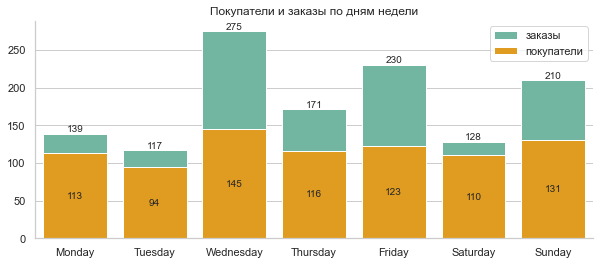

,weekday,day_name,users_count,orders_count
0,0,Monday,113,139
1,1,Tuesday,94,117
2,2,Wednesday,145,275
3,3,Thursday,116,171
4,4,Friday,123,230
5,5,Saturday,110,128
6,6,Sunday,131,210


In [36]:
fig, ax = plt.subplots(figsize=(10, 4))
# график seaborn
sns.barplot(data=buyers_by_day_name, x='day_name', y='orders_count', color='#66C2A5', label='заказы') # #FFA500
ax.bar_label(ax.containers[0], fontsize=10, label_type='edge') # подписи столбцов label_type='edge'
sns.barplot(data=buyers_by_day_name, x='day_name', y='users_count', color='orange', label='покупатели')
# Add labels inside the bars
ax.bar_label(ax.containers[1], fontsize=10, label_type='center') # label_type='center'
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend()
ax.set_title('Покупатели и заказы по дням недели')
sns.despine()
plt.show()

buyers_by_day_name

Больше всего покупателей и покупок - по средам. Меньше всего покупают по вторникам.

### ARPPU и AOV

In [37]:
arppu_aov = (df.groupby('payment_dt_month', as_index=False)
             .agg(users = ('user_id', 'nunique'), orders = ('order_id', 'count'), revenue = ('price', 'sum'))
             .assign(arppu = lambda x: x['revenue'] / x['users'],
                    aov = lambda x: x['revenue'] / x['orders'],
                    koef = lambda x: x['arppu'] / x['aov'])
            )      
# arppu_aov['arppu2'] = arppu_aov['revenue'] / arppu_aov['users']
# arppu_aov['aov2'] = arppu_aov['revenue'] / arppu_aov['orders']
# arppu_aov

In [38]:
# длинная таблица из таблицы-groupby
# arppu_aov_long = pd.melt(arppu_aov, id_vars='payment_dt_month', var_name='metric', value_name='value')
# pd.melt(arppu_aov, id_vars='payment_dt_month', value_vars=['aov', 'arppu'], var_name='metric', value_name='value')

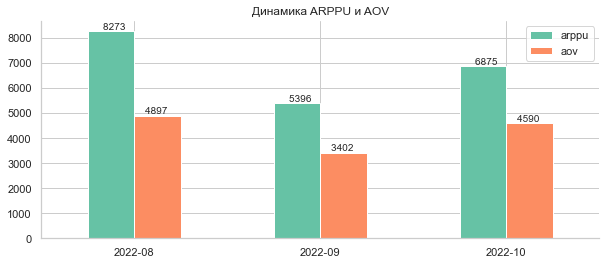

,payment_dt_month,users,orders,revenue,arppu,aov,koef
0,2022-08,251,424,2076498,"8,272.90","4,897.40",1.69
1,2022-09,302,479,1629468,"5,395.59","3,401.81",1.59
2,2022-10,245,367,1684367,"6,874.97","4,589.56",1.50


In [39]:
# графики pandas
fig, ax = plt.subplots(figsize=(10, 4))
arppu_aov.plot(x='payment_dt_month', y=['arppu', 'aov'], kind='bar', rot=0, ax=ax)
plt.xlabel('')

for i in range(len(arppu_aov['payment_dt_month'])):
    (ax.text(i, arppu_aov.arppu[i], 
              str(round(arppu_aov.arppu[i])) + '   ', 
              ha = 'right', va = 'bottom', size=10) # ha = 'center'
    )
for i in range(len(arppu_aov['payment_dt_month'])):
    (ax.text(i, arppu_aov.aov[i], 
              '    ' + str(round(arppu_aov.aov[i])), 
              ha = 'left', va = 'bottom', size=10) #bottom # ha = 'center' / 'left'
    )

plt.title('Динамика ARPPU и AOV')
sns.despine()
plt.show()

arppu_aov

Чем чаще покупатель приобретает товар в указанный период, тем сильнее ARPPU отличается от AOV. Больше всего ARPPU отличается от AOV в августе, следовательно, в августе, покупатели чаще делали повторные покупки и реже - в октябре.

### Средняя, медианная, минимальная и максимальная цена заказа. Квантили.

In [40]:
# статистика по цене за все месяцы
df['price'].describe().T

count     1,270.00
mean      4,244.36
std       7,902.06
min         500.00
25%       1,500.00
50%       2,500.00
75%       4,000.00
max     130,000.00
Name: price, dtype: float64

In [41]:
df.pivot(columns='payment_dt', values='price').describe().T.sample(3, random_state=2).sort_values(by='payment_dt') #  datetime_is_numeric=True ['payment_date'] #.dt #.strftime('%Y-%m-%d')

,count,mean,std,min,25%,50%,75%,max
payment_dt,,,,,,,,
2022-09-05,12.00,"2,750.00","1,971.39","1,000.00","1,000.00","2,000.00","4,000.00","6,000.00"
2022-09-14,40.00,"2,817.50","3,304.46",500.00,"1,000.00","1,500.00","2,500.00","15,000.00"
2022-10-22,7.00,"3,071.43","1,643.89","1,500.00","2,000.00","2,000.00","4,000.00","6,000.00"


In [42]:
df.pivot(columns='payment_dt_month', values='price').describe().T #.sample(5).sort_values(by='payment_dt_month')

,count,mean,std,min,25%,50%,75%,max
payment_dt_month,,,,,,,,
2022-08,424.00,"4,897.40","11,115.84",500.00,"1,500.00","2,500.00","6,000.00","130,000.00"
2022-09,479.00,"3,401.81","5,503.26",500.00,"1,500.00","2,000.00","4,000.00","95,000.00"
2022-10,367.00,"4,589.56","5,709.67",500.00,"1,500.00","2,500.00","5,250.00","45,000.00"


In [43]:
# df.pivot(columns='payment_dt_month', values='price').describe().loc['max'].index

In [44]:
# df.pivot(columns='payment_dt_month', values='price').describe().T.index

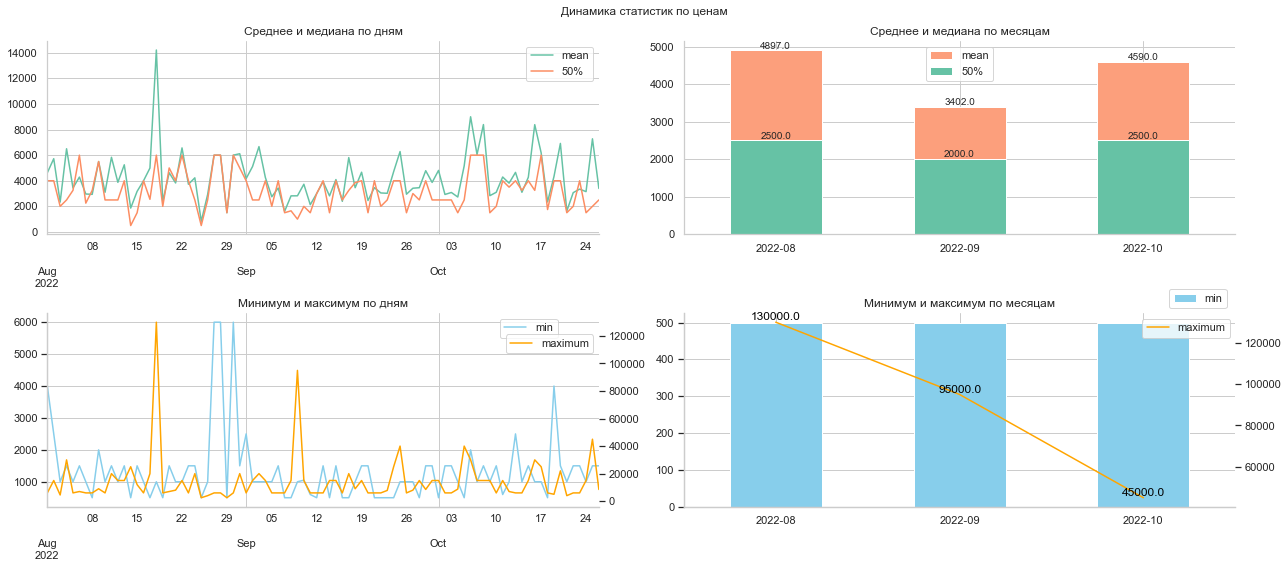

,count,mean,std,min,25%,50%,75%,max
payment_dt,,,,,,,,
2022-09-05 00:00:00,12.00,2750.00,1971.39,1000.00,1000.00,2000.00,4000.00,6000.00
2022-09-14 00:00:00,40.00,2817.50,3304.46,500.00,1000.00,1500.00,2500.00,15000.00
2022-10-22 00:00:00,7.00,3071.43,1643.89,1500.00,2000.00,2000.00,4000.00,6000.00
,count,mean,std,min,25%,50%,75%,max
payment_dt_month,,,,,,,,
2022-08,424.00,4897.40,11115.84,500.00,1500.00,2500.00,6000.00,130000.00
2022-09,479.00,3401.81,5503.26,500.00,1500.00,2000.00,4000.00,95000.00
2022-10,367.00,4589.56,5709.67,500.00,1500.00,2500.00,5250.00,45000.00


In [45]:
# графики pandas
fig, axes = plt.subplots(2, 2, figsize=(18, 8))
(ax1, ax2), (ax3, ax4) = axes

# среднее и медиана по дням - ax1
df.pivot(columns='payment_dt', values='price').describe().loc['mean'].plot(ax=ax1)
df.pivot(columns='payment_dt', values='price').describe().loc['50%'].plot(ax=ax1)
ax1.legend()
ax1.set_xlabel('')
ax1.set_title('Cреднее и медиана по дням')

# среднее и медиана по месяцам - ax2
df.pivot(columns='payment_dt_month', values='price').describe().loc['mean'].plot(ax=ax2, kind='bar', color='#FC9F7C')
df.pivot(columns='payment_dt_month', values='price').describe().loc['50%'].plot(ax=ax2, kind='bar', rot=0)
ax2.legend()
ax2.set_xlabel('')
ax2.set_title('Cреднее и медиана по месяцам')
# подписи столбцов
for i in range(len(df.pivot(columns='payment_dt_month', values='price').describe().loc['mean'])):
    (ax2.text(i, df.pivot(columns='payment_dt_month', values='price').describe().loc['mean'][i], 
              round(df.pivot(columns='payment_dt_month', values='price').describe().loc['mean'], 0)[i], 
              ha = 'center', va = 'bottom', size=10)
    )
for i in range(len(df.pivot(columns='payment_dt_month', values='price').describe().loc['50%'])):
    (ax2.text(i, df.pivot(columns='payment_dt_month', values='price').describe().loc['50%'][i], 
              round(df.pivot(columns='payment_dt_month', values='price').describe().loc['50%'], 0)[i], 
              ha = 'center', va = 'bottom', size=10)
    )

# минимум по дням - ax3
df.pivot(columns='payment_dt', values='price').describe().loc['min'].plot(label='min', ax=ax3, color='skyblue',)
ax3.legend(bbox_to_anchor=(0.935, 1) ) # loc='upper right',
ax3.set_xlabel('')
ax3.set_title('Минимум и максимум по дням')

# максимум по дням - ax5
ax5 = ax3.twinx() #ax3 = ax2.twinx()
df.pivot(columns='payment_dt', values='price').describe().loc['max'].plot(color='orange', label='maximum', ax=ax5)
ax5.grid(False)
ax5.legend(bbox_to_anchor=(1, 0.92))

#  минимум по месяцам - ax4
df.pivot(columns='payment_dt_month', values='price').describe().loc['min'].plot(label='min', ax=ax4, color='skyblue', kind='bar', rot=0) #kind='bar'
ax4.legend(bbox_to_anchor=(0.87, 1) ) # loc='upper right',
#ax4.set_xticklabels(df.pivot(columns='payment_dt_month', values='price').describe().loc['max'].index)
ax4.set_xlabel('')
ax4.set_title('Минимум и максимум по месяцам')

#  максимум по месяцам - ax6
ax6 = ax4.twinx() #ax3 = ax2.twinx()
( df.pivot(columns='payment_dt_month', values='price').describe().loc['max']
 .plot(kind='line', color='orange', label='maximum', ax=ax6, use_index=False) # use_index=False - ставим, иначе ошибка с отображением графика по второй оси y
)
# use_index=False, secondary_y=True, mark_right=False
#ax6.set_ylabel('Maximum')
ax6.grid(False)
ax6.legend(bbox_to_anchor=(1, 1))

# подписи значений для lineplot
for i, txt in enumerate(df.pivot(columns='payment_dt_month', values='price').describe().loc['max']):
    (ax6.text(df.pivot(columns='payment_dt_month', values='price').describe().loc['max'].reset_index().index[i], 
              df.pivot(columns='payment_dt_month', values='price').describe().loc['max'][i], 
              f'{round(txt, 0)}', ha='center', va='bottom', color='black', size=12)
    )

sns.despine()
plt.suptitle('Динамика статистик по ценам')
plt.tight_layout()
plt.show()

# таблицы под графиками
df_stats_dt = df.pivot(columns='payment_dt', values='price').describe().T.sample(3, random_state=2).sort_values(by='payment_dt')
df_stats_mnth = df.pivot(columns='payment_dt_month', values='price').describe().T

# стили для таблиц side by side
# .format({'df_stats_dt.index': "{:%Y-%m-%d}"})
# '{:,.2f}'
df_stats_dt_styler = (df_stats_dt.sample(3, random_state=1).sort_values(by='payment_dt')
                     .style.set_table_attributes("style='display:inline'")
                     .set_caption('Статистики цен по дням (3 рандомных дня)')
                     .format('{:.2f}') # формат float
                    )
df_stats_mnth_styler = df_stats_mnth.style.set_table_attributes("style='display:inline'").set_caption('Статистики цен по месяцам').format('{:.2f}')
space = "\xa0" * 30
display_html(df_stats_dt_styler._repr_html_() + space + df_stats_mnth_styler._repr_html_(), raw=True)

 #'{:,.2f}'.format

Наиболе высокие медианные значения цены в августе и октябре - 2500 р., в сентябре покупали более дешевые карты. <br>
Наблюдаются несколько пиков максимальной цены - 130 000 р. в середине августа, 95 000 р. в начале октября. Минимальная цена стабильна - 500 р. и обусловлена минимально возможным номиналом сертификата.

In [46]:
# Квантили за 3 месяца
df['price'].quantile([0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

0.25    1,500.00
0.50    2,500.00
0.75    4,000.00
0.90    6,000.00
0.95   15,000.00
0.99   30,000.00
Name: price, dtype: float64

In [47]:
print('Квантили по месяцам')
df.pivot(columns='payment_dt_month', values='price').quantile([0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

Квантили по месяцам


payment_dt_month,2022-08,2022-09,2022-10
0.25,"1,500.00","1,500.00","1,500.00"
0.50,"2,500.00","2,000.00","2,500.00"
0.75,"6,000.00","4,000.00","5,250.00"
0.90,"6,000.00","6,000.00","8,000.00"
0.95,"15,000.00","7,820.00","15,000.00"
0.99,"41,550.00","20,000.00","30,000.00"


In [48]:
print('Квантили за 3 месяца:')
df['price'].quantile([0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).to_frame()

Квантили за 3 месяца:


,price
0.25,"1,500.00"
0.50,"2,500.00"
0.75,"4,000.00"
0.90,"6,000.00"
0.95,"15,000.00"
0.99,"30,000.00"


В целом, за 3 месяца:
- 50% (медиана) пользователей покупают сертификат не более, чем за 2 500 р.<br>
- 75% пользователей покупают сертификат не более, чем за 4 000 р.<br>
- 90% пользователей покупают сертификат не более, чем за 6 000 р.<br>
- 99% пользователей покупают сертификат не более, чем за 30 000 р.<br>
Покупки более 30 000 р. можно считать выбросами.<br>
Среднее значение цены сертификата - около 4 000 р. (из-за выбросов, средняя цена выше медианной).

### Частота покупок

#### Purchase Frequency (F)

Среднее количество заказов на одного пользователя (F = Количество покупок / Число уникальных покупателей).

In [49]:
round(df['order_id'].count() / df['user_id'].nunique(), 2)

1.65

Посмотрим динамику среднего количества покупок на одного покупателя в разрезе дня и месяца.

In [50]:
# Количество заказов на одного пользователя по дням
orders_per_user = (df.groupby('payment_dt', as_index=False).agg(orders_count = ('order_id', 'count'), users_count = ('user_id', 'nunique'))
                   .assign(orders_per_user = lambda x: x['orders_count'] / x['users_count']                   
                  ))
# display(orders_per_user.head())
                   
orders_per_user_m = (df.groupby('payment_dt_month', as_index=False).agg(orders_count = ('order_id', 'count'), users_count = ('user_id', 'nunique'))
                     .assign(orders_per_user = lambda x: round(x['orders_count'] / x['users_count'], 2))
                    )
# orders_per_user_m['orders_per_user'] = round(orders_per_user_m['order_id'] / orders_per_user_m['user_id'], 2)
# orders_per_user_m.head()

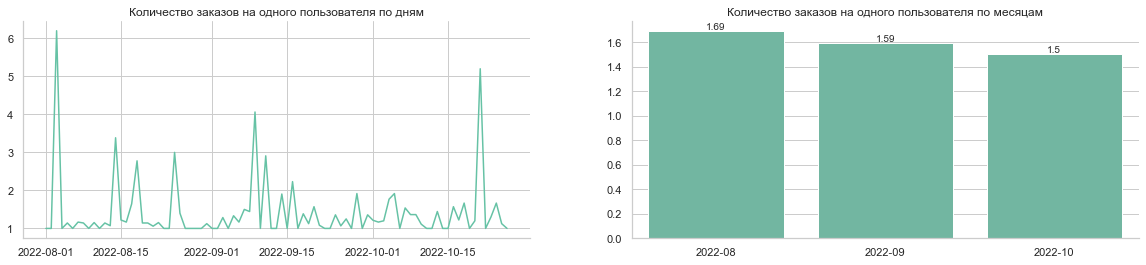

,payment_dt,orders_count,users_count,orders_per_user
27,2022-08-28,1,1,1.00
38,2022-09-08,26,18,1.44
44,2022-09-14,40,21,1.90
,payment_dt_month,orders_count,users_count,orders_per_user
0,2022-08,424,251,1.69
1,2022-09,479,302,1.59
2,2022-10,367,245,1.50


In [51]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))

# графики seaborn
sns.lineplot(data=orders_per_user, x='payment_dt', y='orders_per_user', ax=ax1, color='#66C2A5')
# Annotate specific points 
# for i, txt in enumerate(orders_per_user['orders_per_user']):
#     ax1.text(orders_per_user['payment_dt'][i], orders_per_user['orders_per_user'][i], f'{txt}', ha='center', va='bottom', color='blue')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Количество заказов на одного пользователя по дням') 

sns.barplot(data=orders_per_user_m, x='payment_dt_month', y='orders_per_user', ax=ax2, color='#66C2A5')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.bar_label(ax2.containers[0])
ax2.set_title('Количество заказов на одного пользователя по месяцам')  

sns.despine()
plt.show()

# таблицы
orders_per_user
orders_per_user_m

# стили для таблиц side by side
orders_per_user_styler = (orders_per_user.sample(3, random_state=1).sort_values(by='payment_dt')
                     .style.set_table_attributes("style='display:inline'")
                     .set_caption('Количество заказов на одного пользователя по дням')
                     .format({'payment_dt': "{:%Y-%m-%d}"}) # формат дат
                     .format({'orders_per_user': "{:,.2f}"})
                    )
orders_per_user_m_styler = (orders_per_user_m.style.set_table_attributes("style='display:inline'")
                            .set_caption('Количество заказов на одного пользователя по месяцам')
                            .format({'orders_per_user': "{:,.2f}"})
                           )
space = "\xa0" * 90
print()
display_html(orders_per_user_styler._repr_html_() + space + orders_per_user_m_styler._repr_html_(), raw=True)

Среднее количество заказов на одного покупателя нестабильно. Немного снижается от месяца к месяцу.

#### Количество покупателей, совершивших повторные покупки

In [52]:
users_more_1_order_m = (df.groupby(['payment_dt_month', 'user_id'], as_index=False)
 .agg(user_count = ('user_id', 'count'))
 .query('user_count > 1')
 .groupby('payment_dt_month', as_index=False).agg(users_more_1_order = ('user_count','count'))
 .merge(df.groupby('payment_dt_month', as_index=False).agg(all_users = ('user_id', 'nunique')))
 .assign(users_more_1_order_rate = lambda x: x['users_more_1_order'] / x['all_users'])
)    
# users_more_1_order_m

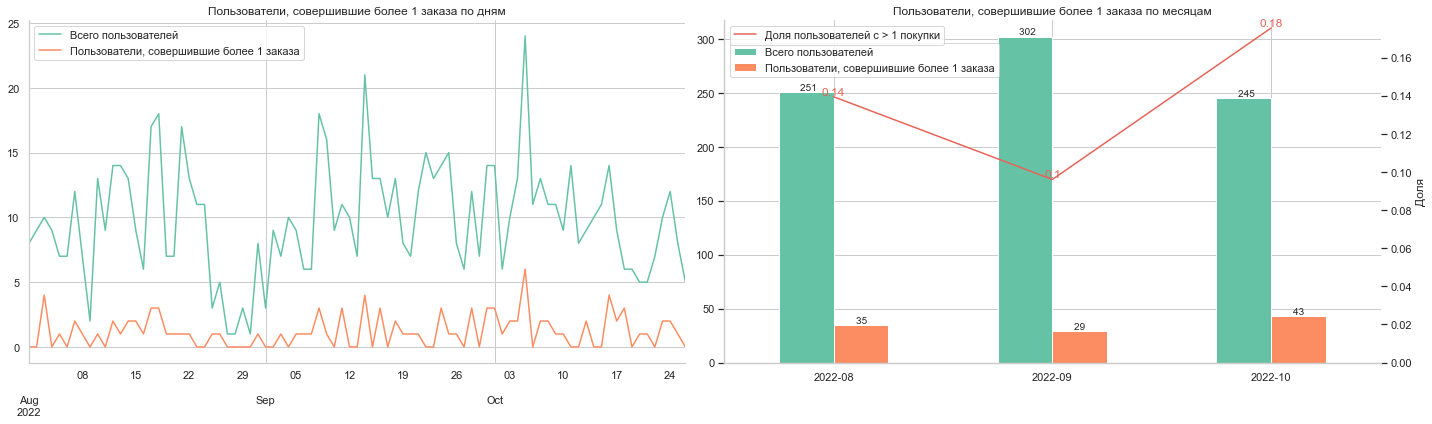

,payment_dt_month,users_more_1_order,all_users,users_more_1_order_rate
0,2022-08,35,251,0.14
1,2022-09,29,302,0.10
2,2022-10,43,245,0.18


In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# график по дням
(df.groupby(['payment_dt', 'user_id'], as_index=False)
 .agg(user_count = ('user_id', 'count'))
 .query('user_count > 1')
 .groupby('payment_dt', as_index=False).agg(users_more_1_order = ('user_count','count'))
 .merge(df.groupby('payment_dt', as_index=False).agg(all_users = ('user_id', 'nunique')), how='right')
 .assign(users_more_1_order_rate = lambda x: x['users_more_1_order'] / x['all_users'])
 .fillna(0)
       .plot(x='payment_dt', 
             y=['all_users', 'users_more_1_order'],  
             label=['Всего пользователей', 'Пользователи, совершившие более 1 заказа'], 
             ax=ax1)
)
ax1.set_xlabel('')
ax1.legend(loc='upper left')
ax1.set_title('Пользователи, совершившие более 1 заказа по дням')

#df.groupby('payment_dt').agg('order_id').count().plot(ax=ax1, label='заказы')
# график по месяцам
users_more_1_order_m.plot(kind='bar', #stacked=True,[1, 1, 1],
               x='payment_dt_month', 
               y=['all_users', 'users_more_1_order'],   #'all_users'
               label=['Всего пользователей', 'Пользователи, совершившие более 1 заказа'], 
               ax=ax2,
               rot=0)

ax2.set_xlabel('')
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.95))
ax2.set_title('Пользователи, совершившие более 1 заказа по месяцам')

# подписи столбцов
for i in range(len(users_more_1_order_m['payment_dt_month'])):
    (ax2.text(i, users_more_1_order_m.all_users[i], 
              str(round(users_more_1_order_m.all_users[i])) + '      ', 
              ha = 'right', va = 'bottom', size=10) # ha = 'center'
    )
for i in range(len(users_more_1_order_m['payment_dt_month'])):
    (ax2.text(i, users_more_1_order_m.users_more_1_order[i], 
              '        ' + str(round(users_more_1_order_m.users_more_1_order[i])), 
              ha = 'left', va = 'bottom', size=10) # ha = 'center'
    )

# lineplot - доля
ax3 = ax2.twinx()
users_more_1_order_m.plot(kind='line', 
               #x='payment_dt_month', # убираем, иначе ошибка по второй оси y
               y='users_more_1_order_rate',  
               label='Доля пользователей с > 1 покупки', 
               ax=ax3,
               color='#E76357')

ax3.set_ylabel('Доля')
ax3.set_ylim(bottom=0)
ax3.grid(False)

# подписи значений для lineplot
for i, txt in enumerate(users_more_1_order_m['users_more_1_order_rate']):
    ax3.text(users_more_1_order_m.index[i], users_more_1_order_m['users_more_1_order_rate'][i], f'{round(txt, 2)}', ha='center', va='bottom', color='#E76357', size=12)

sns.despine()
plt.tight_layout()
plt.show()

# таблица
users_more_1_order_m

Доля пользователей, совершивших более 1 покупки в месяц - 10-18%. Чаще всего, более одной покупки, пользователи совершали в октябре, реже всего - в сентябре.

#### Количество пользователей, покупающих определенное количество сертификатов

Посмотрим детальнее по сколько карт покупают пользователи и каково количетво покупателей, приобретающих то или иное количество сертификатов.

In [54]:
# print('По сколько карт покупают пользователи')
orders_quantity_per_user = df.groupby(['payment_dt_month', 'user_id'], as_index=False).agg(orders_quantity = ('order_id', 'count'))
orders_quantity = (orders_quantity_per_user.groupby(['payment_dt_month','orders_quantity'], as_index=False)
                   .agg(users_count = ('user_id', 'nunique'))
  
                  )
#orders_quantity.head()

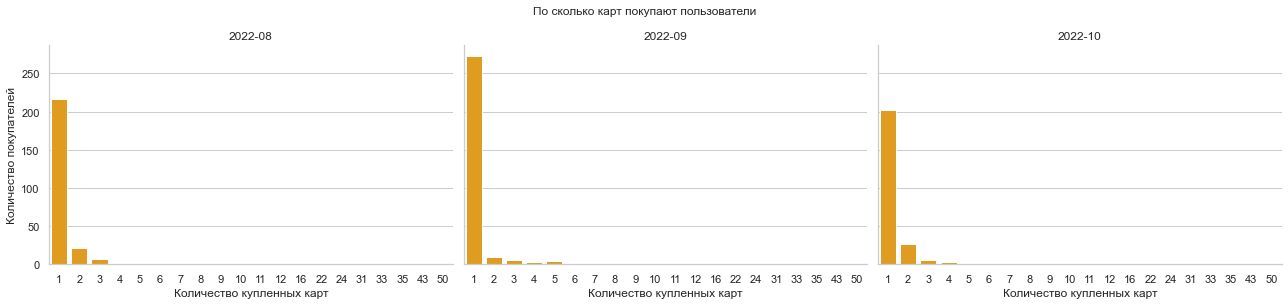

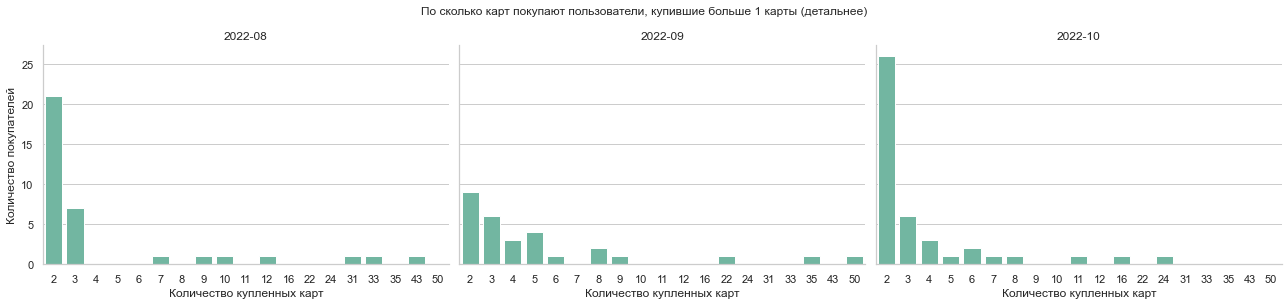



                                                                       По сколько карт покупают пользователи



,payment_dt_month,orders_quantity,users_count,users_count_rate
0,2022-08,1,216,0.86
1,2022-08,2,21,0.08
2,2022-08,3,7,0.03
3,2022-08,7,1,0.00
4,2022-08,9,1,0.00
5,2022-08,10,1,0.00
6,2022-08,12,1,0.00
7,2022-08,31,1,0.00
8,2022-08,33,1,0.00
9,2022-08,43,1,0.00


In [55]:
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
# график оранжевый
f1 = (sns.catplot(data=orders_quantity, 
                  x='orders_quantity', 
                  y='users_count', 
                  col='payment_dt_month', 
                  kind='bar', 
                  color='orange', 
                  height=4, 
                  aspect=1.5)
     )
(f1.set_titles('{col_name}')
 .set_xlabels('Количество купленных карт')
 .set_ylabels('Количество покупателей')
)
plt.suptitle('По сколько карт покупают пользователи', y=1.05, size=12) # y=1.05 - отступ от title графиков
plt.show()
print()
print()

# график зеленый
f2 = ( sns.catplot(data=orders_quantity[orders_quantity['orders_quantity'] > 1], 
                   x='orders_quantity', 
                   y='users_count', 
                   col='payment_dt_month', 
                   kind='bar', 
                   color='#66C2A5',  
                   height=4, 
                   aspect=1.5)
     )
( f2.set_titles('{col_name}')
 .set_xlabels('Количество купленных карт')
 .set_ylabels('Количество покупателей')
)
plt.suptitle('По сколько карт покупают пользователи, купившие больше 1 карты (детальнее)', y=1.05, size=12)
plt.show()

# таблицы
august = (orders_quantity[orders_quantity['payment_dt_month'] == "2022-08"]
       .assign(users_count_rate = lambda x: x['users_count'] / x['users_count'].sum())
      )

september = (orders_quantity[orders_quantity['payment_dt_month'] == "2022-09"]
       .assign(users_count_rate = lambda x: x['users_count'] / x['users_count'].sum())
      )

october = (orders_quantity[orders_quantity['payment_dt_month'] == "2022-10"]
       .assign(users_count_rate = lambda x: x['users_count'] / x['users_count'].sum())
      )


# стили для таблиц side by side
august_styler = (august # .sort_values(by='orders_quantity')
                     .style.set_table_attributes("style='display:inline'")
                     .set_caption('Август')
                     .format({'users_count_rate': "{:,.2f}"}) # формат дат {:,.2f}
                     .set_table_styles([{
                                #'selector': 'th, td', # применить ко всем таблицам
                                'props': [('font-size', '70%')]  # размер шрифта, чтобы таблицы влезли в 3 колонки
                            }])
                    )

september_styler = ( september.style.set_table_attributes("style='display:inline'")
                    .set_caption('Сентябрь')
                    .format({'users_count_rate': "{:,.2f}"})
                    .set_table_styles([{
                            'props': [('font-size', '70%')]
                        }])
                   )
october_styler = ( october.style.set_table_attributes("style='display:inline'")
                  .set_caption('Октябрь')
                  .format({'users_count_rate': "{:,.2f}"})
                  .set_table_styles([{
                            'props': [('font-size', '70%')]
                        }])
                 )
space = "\xa0" * 5
print()
print()
print(f'{" "*70} По сколько карт покупают пользователи')
print()
display_html(august_styler._repr_html_() + space + september_styler._repr_html_() + space + october_styler._repr_html_(), raw=True)

Подавляющее большинство покупателей (> 80%) покупают по 1 сертификату в месяц. <br>
Около 7% покупателей берут по 2 сертификата в месяц. <br>
2-3% - покупают 3 и более сертификатов в месяц.<br> 
Также встречаются отдельные оптовые покупатели, которые берут по 10-12, 16-24 и даже по 31-50 сертификатов в месяц.

### Магазины

#### Количество магазинов

In [56]:
df.head()

,card_id,order_id,user_id,price,payment_date,receipt_date,store,buyers_email,recipients_email,payment_dt,payment_dt_month,day_name,weekday
0,1,100,343,4000,2022-08-01 12:00:35,2022-08-01 12:01:03,Мультисертификат,qWRdaqdWE001@mail.ru,cdKH125adsjkld585@mail.ru,2022-08-01,2022-08,Monday,0
1,2,200,457,4000,2022-08-01 12:02:23,2022-08-01 12:03:02,Мультисертификат детский,qWRdaqdWE002@yandex.ru,cdKH125adsjkld1042@yandex.ru,2022-08-01,2022-08,Monday,0
2,3,300,281,6000,2022-08-01 12:34:38,2022-08-01 13:01:03,Тайский массаж,qWRdaqdWE003@gmail.com,cdKH125adsjkld142@gmail.com,2022-08-01,2022-08,Monday,0
3,4,400,760,4000,2022-08-01 15:10:45,2022-08-01 15:11:02,Детский Мир,qWRdaqdWE004@gmail.com,cdKH125adsjkld143@bk.ru,2022-08-01,2022-08,Monday,0
4,5,500,684,6000,2022-08-01 15:21:43,2022-08-01 15:23:02,Детский Мир,qWRdaqdWE005@gmail.com,cdKH125adsjkld144@mail.ru,2022-08-01,2022-08,Monday,0


In [57]:
df['store'].nunique()

49

#### Доля магазинов в продажах

In [58]:
stores = (df['store'].value_counts().to_frame()
 .join(df['store'].value_counts(normalize=True).to_frame(), lsuffix='_count', rsuffix='_rate')
 .reset_index()
 .rename(columns={'index':'store'})
)
print('Покупки по магазинам')
stores


Покупки по магазинам


,store,store_count,store_rate
0,Детский Мир,283,0.22
1,Мультисертификат,255,0.20
2,Перекресток,163,0.13
3,Рив Гош,158,0.12
4,Улыбка Радуги,125,0.10
5,Триал-спорт,33,0.03
6,Ив Роше,33,0.03
7,Мультисертификат женский,28,0.02
8,Рандеву,22,0.02
9,Хофф,18,0.01


Чаще всего покупают сертификаты Детского мира, Мультисертификат (универсальный), карты Перекрестка, Рив Гош и Улыбки радуги. Карты отсальных магазинов покупают в 3-х и менее процентах случаев.

#### Разброс цен по магазинам

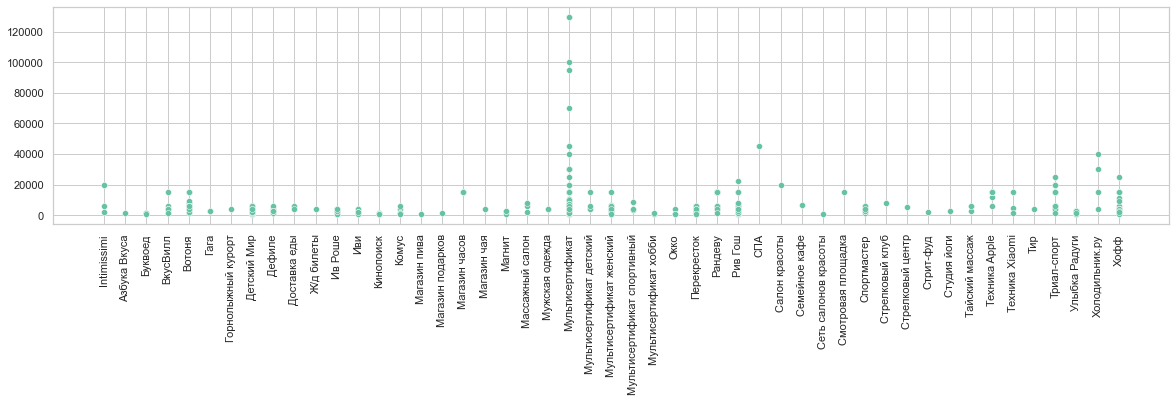

In [59]:
# стиль графика
# with sns.set(style="whitegrid", context="notebook"): # style=darkgrid/whitegrid/dark/white/ticks, context=talk/paper/notebook/poster  
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(20, 4))
    sns.scatterplot(data=df.sort_values(by='store'), x='store', y='price') 
    #ax = sns.scatterplot(x="total_bill", y="tip", data=tips)
    
# seaborn установить верхнюю ось x
#sns.set(rc={"xtick.labeltop": True, "xtick.labelbottom": True})
      
ax.set_xlabel('', size=10)  
plt.xticks(rotation=90)
#ax.set_xticklabels(df['store'], rotation=90) - не работает
ax.set_ylabel('', size=10)

# matplotlib установить верхнюю ось x
#ax.tick_params(labelbottom=True, labeltop=True)
#ax.xaxis.set_label_position('top')

# убрать верхнюю и правую границу графика
# sns.despine()
plt.show()

Наибольший разброс цен характерен Мультисертификату (универсальному) - до 130 000 р. <br>
Для СПА, Холодильника.ру, Рив Гош, Триал-спорт, и Хофф - цены могут превышать 20 000 р. <br>
Остальным магазинам характерны цены до 20 000 р.                                                                                            

#### Топ-5 магазинов

Посмотрим на магазины более глобально - объедним все мультисертификаты в единую категорию "Мультисертификаты", а магазины ниже топ-5 в категорию "Другие".

In [60]:
#top_stores = ['Детский Мир', 'Мультисертификат', 'Перекресток', 'Рив Гош', 'Улыбка Радуги']
top5_stores = stores['store'][:5].to_list() 
top5_stores

['Детский Мир', 'Мультисертификат', 'Перекресток', 'Рив Гош', 'Улыбка Радуги']

In [61]:
# объединям все мультисертификаты и "другое"
df['stores_cat'] = df['store'].apply(get_others_store)

In [62]:
df.head()

,card_id,order_id,user_id,price,payment_date,receipt_date,store,buyers_email,recipients_email,payment_dt,payment_dt_month,day_name,weekday,stores_cat
0,1,100,343,4000,2022-08-01 12:00:35,2022-08-01 12:01:03,Мультисертификат,qWRdaqdWE001@mail.ru,cdKH125adsjkld585@mail.ru,2022-08-01,2022-08,Monday,0,Мультисертификаты
1,2,200,457,4000,2022-08-01 12:02:23,2022-08-01 12:03:02,Мультисертификат детский,qWRdaqdWE002@yandex.ru,cdKH125adsjkld1042@yandex.ru,2022-08-01,2022-08,Monday,0,Мультисертификаты
2,3,300,281,6000,2022-08-01 12:34:38,2022-08-01 13:01:03,Тайский массаж,qWRdaqdWE003@gmail.com,cdKH125adsjkld142@gmail.com,2022-08-01,2022-08,Monday,0,Другие
3,4,400,760,4000,2022-08-01 15:10:45,2022-08-01 15:11:02,Детский Мир,qWRdaqdWE004@gmail.com,cdKH125adsjkld143@bk.ru,2022-08-01,2022-08,Monday,0,Детский Мир
4,5,500,684,6000,2022-08-01 15:21:43,2022-08-01 15:23:02,Детский Мир,qWRdaqdWE005@gmail.com,cdKH125adsjkld144@mail.ru,2022-08-01,2022-08,Monday,0,Детский Мир


In [63]:
df['stores_cat'].unique()

array(['Мультисертификаты', 'Другие', 'Детский Мир', 'Рив Гош',
       'Улыбка Радуги', 'Перекресток'], dtype=object)

In [64]:
#p = df.groupby('stores_cat').agg({'stores_cat':'count'}).rename(columns={'stores_cat':'counts'}).sort_values(by='counts', ascending=False).reset_index()
#display(p)

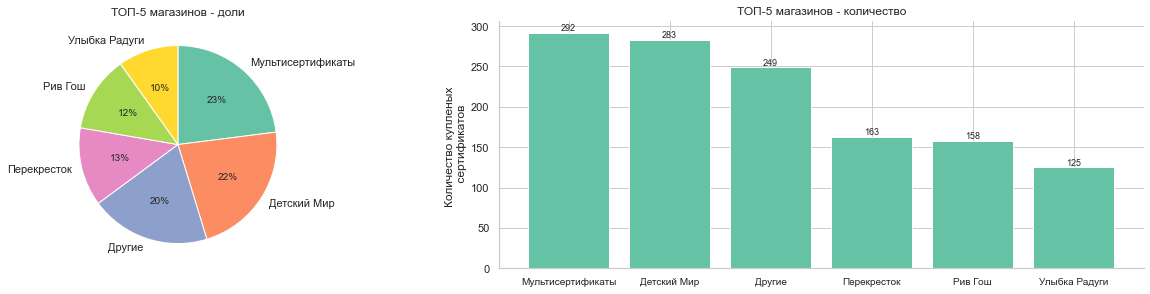

,Магазин,"Количество сертификатов, шт.",Доля
0,Мультисертификаты,292,0.23
1,Детский Мир,283,0.22
2,Другие,249,0.20
3,Перекресток,163,0.13
4,Рив Гош,158,0.12
5,Улыбка Радуги,125,0.10


In [65]:
#  таблица
p = df.groupby('stores_cat').agg({'stores_cat':'count'}).rename(columns={'stores_cat':'counts'}).sort_values(by='counts', ascending=False).reset_index()

p.columns = ['Магазин', 'Количество сертификатов, шт.']
p['Доля'] = p['Количество сертификатов, шт.'] / len(df)

#  создаем пространство для двух графиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))

#  pie chart
(ax1.pie(p['Количество сертификатов, шт.'], 
         labels=p['Магазин'], 
         autopct='%.0f%%', 
         #colors=['salmon', 'lightblue', 'lightgreen', 'moccasin', 'plum', 'khaki'], 
         counterclock=False,
         startangle=-270) #'%1.1f%%' '%.0f%%'
)
ax1.set_title('ТОП-5 магазинов - доли')

#  bar chart
ax2.bar(p['Магазин'], p['Количество сертификатов, шт.'], label='Тест', ) # color='lightblue'
ax2.set_xticks(p['Магазин']) # , size=9, rotation=50, horizontalalignment='center'
ax2.set_xticklabels(p['Магазин'], size=10, rotation=0, horizontalalignment='center')
ax2.set_xlabel('', size=12)
ax2.set_ylabel('Количество купленых \n сертификатов', size=12)
#  подписи к столбцам
for i in range(len(p['Количество сертификатов, шт.'])):
    plt.annotate(str(p['Количество сертификатов, шт.'][i]), 
                 xy=(p['Магазин'][i], 
                     p['Количество сертификатов, шт.'][i]), 
                 ha='center', 
                 va='bottom',
                 size=9)
ax2.set_title('ТОП-5 магазинов - количество', size=12)

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0) #  поместить subplots в область figure 
sns.despine()
plt.show()

display(p)

После объединения всех мультисертификатов (универсальный, детский, женский, спортивный, хобби) в единую категорию "Мультисертификаты", их доля возрасла с 20% до 23% и они вышли на 1-ю позицию в топ-5 магазинов. В совокупности они приносят больше всего продаж. <br>
Второе место занимает Детский мир - 22%.  <br>
Карты остальных магазинов покупают в 3-х и менее процентах случаев. Общая доля таких магазинов составляет - 20%. 

Топ-5 магазинов:
- Мультисертификаты (все) - 23%
- Детский Мир - 22%
- Другие (все остальные магазины) - 20%
- Перекресток - 13%
- Рив Гош - 12%
- Улыбка Радуги - 10%

#### Стоимость сертификатов по магазинам из топ-5 (количество, медиана, среднее, максимум, минимум)

In [66]:
df.head()

,card_id,order_id,user_id,price,payment_date,receipt_date,store,buyers_email,recipients_email,payment_dt,payment_dt_month,day_name,weekday,stores_cat
0,1,100,343,4000,2022-08-01 12:00:35,2022-08-01 12:01:03,Мультисертификат,qWRdaqdWE001@mail.ru,cdKH125adsjkld585@mail.ru,2022-08-01,2022-08,Monday,0,Мультисертификаты
1,2,200,457,4000,2022-08-01 12:02:23,2022-08-01 12:03:02,Мультисертификат детский,qWRdaqdWE002@yandex.ru,cdKH125adsjkld1042@yandex.ru,2022-08-01,2022-08,Monday,0,Мультисертификаты
2,3,300,281,6000,2022-08-01 12:34:38,2022-08-01 13:01:03,Тайский массаж,qWRdaqdWE003@gmail.com,cdKH125adsjkld142@gmail.com,2022-08-01,2022-08,Monday,0,Другие
3,4,400,760,4000,2022-08-01 15:10:45,2022-08-01 15:11:02,Детский Мир,qWRdaqdWE004@gmail.com,cdKH125adsjkld143@bk.ru,2022-08-01,2022-08,Monday,0,Детский Мир
4,5,500,684,6000,2022-08-01 15:21:43,2022-08-01 15:23:02,Детский Мир,qWRdaqdWE005@gmail.com,cdKH125adsjkld144@mail.ru,2022-08-01,2022-08,Monday,0,Детский Мир


In [67]:
median_check = df.groupby('stores_cat', as_index=False).agg({'price':['count', 'median', 'mean', 'max', 'min']}) # .sort_values(by='price', ascending=False)
median_check.columns = ['Магазин', 'Количество, шт.', 'Медиана, p.', 'Среднее, p.', 'Максимум, p.', 'Минимум, p.']
median_check = median_check.sort_values(by='Медиана, p.', ascending=False) 
#  print('Стоимость сертификатов по магазинам из топ-6')

#  display(median_check.sort_values(by='Количество', ascending=False))
#  median_check

col = 'Количество, шт.'
title = 'Стоимость сертификатов по магазинам из топ-5'
float_col = 'Среднее, p.'
# set_title(median_check)

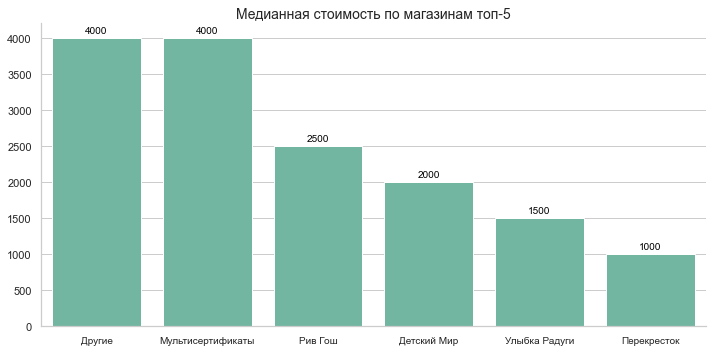

,Магазин,"Количество, шт.","Медиана, p.","Среднее, p.","Максимум, p.","Минимум, p."
0,Мультисертификаты,292,4000,"6,562.25",130000,500
1,Детский Мир,283,2000,"3,224.38",6000,500
2,Другие,249,4000,"5,891.11",45000,500
3,Перекресток,163,1000,"2,303.68",6000,500
4,Рив Гош,158,2500,"3,232.72",22000,1000
5,Улыбка Радуги,125,1500,"1,668.00",2500,1000


In [68]:
fig, ax = plt.subplots(figsize=(10, 5))
# график seaborn
#sns.set_palette('Blues')
sns.barplot(data=median_check, x=median_check['Магазин'], y=median_check['Медиана, p.'], ax=ax, color='#66C2A5') # color='lightblue'
#ax.set_xticks()
ax.set_xlabel('', size=10)
ax.set_xticklabels(median_check['Магазин'], size=10)
ax.set_ylabel('', size=10)
ax.bar_label(ax.containers[0], label_type='edge', color='black', rotation=0, fontsize=10, padding=3)
ax.set_title('Медианная стоимость по магазинам топ-5', size=14)
plt.tight_layout()
sns.despine()
plt.show()

print()
set_title(median_check)

Наиболее высокий медианный чек характерен магазинам в категории "Другие" и Мультисертификатам (все). При этом, средняя цена Мультисертификатов почти на 1 000 р. выше, чем в категории "Другие", что связано с аномально высокими разовыми номиналами, которые выбирают покупатели для мультисертификатов.

#### Стоимость сертификатов по магазинам из категории "Другие" (количество, медиана, среднее, максимум, минимум)

In [69]:
# df[~df['store'].isin(top5_stores)]
# .rename(columns={'stores_cat':'counts'}).sort_values(by='counts', ascending=False)
median_check_others = (df.query("store not in @top5_stores").sort_values(by='price', ascending=False)
                       .groupby('store', as_index=False)
                       .agg({'price':['count', 'median', 'mean', 'max', 'min']})
                       .sort_values(by=[('price','count')], ascending=False)
                       .reset_index(drop= True)
                      )
median_check_others.columns = ['Магазин', 'Количество, шт.', 'Медиана, p.', 'Среднее, p.', 'Максимум, p.', 'Минимум, p.']
median_check_others = median_check_others.sort_values(by='Медиана, p.', ascending=False) 

col = 'Количество, шт.'
title = 'Стоимость сертификатов по магазинам из категории "Другие"'
float_col = 'Среднее, p.'
#set_title(median_check_others)

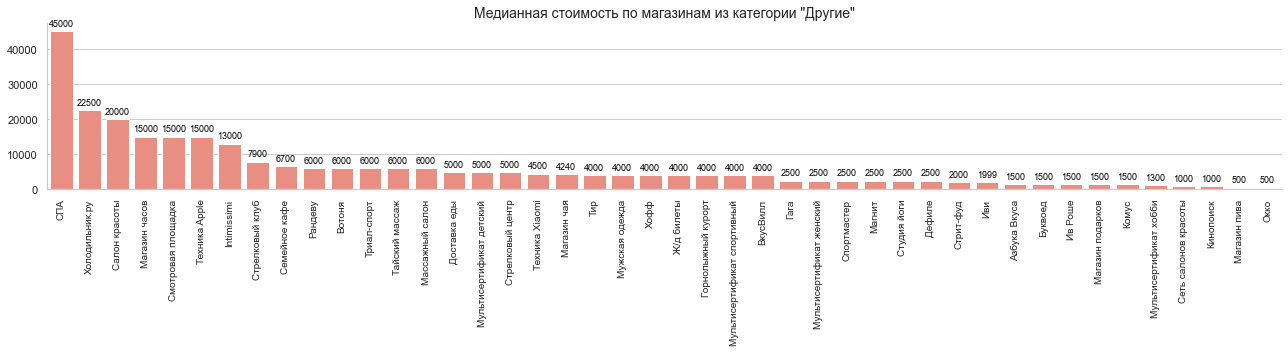

,Магазин,"Количество, шт.","Медиана, p.","Среднее, p.","Максимум, p.","Минимум, p."
0,Триал-спорт,33,6000,"7,651.52",25000,1500
1,Ив Роше,33,1500,"1,984.85",4000,500
2,Мультисертификат женский,28,2500,"3,357.14",15000,500
3,Рандеву,22,6000,"9,250.00",15000,1500
4,Хофф,18,4000,"7,888.89",25000,1000
5,Вотоня,16,6000,"6,531.25",15000,1500
6,Кинопоиск,13,1000,"1,000.00",1500,500
7,Спортмастер,11,2500,"3,454.55",6000,1500
8,Техника Apple,10,15000,"13,800.00",15000,6000
9,Буквоед,10,1500,"1,140.00",1500,600


In [70]:
fig, ax = plt.subplots(figsize=(18, 5))
#sns.set_palette('Blues')
sns.barplot(data=median_check_others, x=median_check_others['Магазин'], y=median_check_others['Медиана, p.'], ax=ax, color='salmon')
#ax.set_xticks()
ax.set_xlabel('', size=10)
ax.set_xticklabels(median_check_others['Магазин'], size=10, rotation=90)
ax.set_ylabel('', size=10)
ax.bar_label(ax.containers[0], label_type='edge', color='black', rotation=0, fontsize=9, padding=3)
ax.set_title('Медианная стоимость по магазинам из категории "Другие"', size=14)
plt.tight_layout()
sns.despine()
plt.show()

set_title(median_check_others)

Самый высокий медианный чек у СПА, при этом, был куплен только один сертификат этого магазина. <br>
Холодильник.ру - куплено 4 сертификата, медианная цена - 22 500 р.<br>
Салон красоты - куплен 1 сертификат, медианная цена - 20 000 р.<br>
Самый частопокупаемый магазин из категории Другие" - Триал-спорт - куплено 33 сертификата, медианная цена - 6000 р.

### Мультисертификаты

#### Количество мультисертификатов

In [71]:
# смотрим, какие мультисертификаты бывают
multi_sert = []
for i in df['store'].unique():
    if 'мультисертификат' in i.lower():
        multi_sert.append(i)  
multi_sert

['Мультисертификат',
 'Мультисертификат детский',
 'Мультисертификат женский',
 'Мультисертификат хобби',
 'Мультисертификат спортивный']

In [72]:
# формируем таблицу только по мультисертификатам 
multi = df.query('store.str.contains("Мультисертификат")')
multi.head()

,card_id,order_id,user_id,price,payment_date,receipt_date,store,buyers_email,recipients_email,payment_dt,payment_dt_month,day_name,weekday,stores_cat
0,1,100,343,4000,2022-08-01 12:00:35,2022-08-01 12:01:03,Мультисертификат,qWRdaqdWE001@mail.ru,cdKH125adsjkld585@mail.ru,2022-08-01,2022-08,Monday,0,Мультисертификаты
1,2,200,457,4000,2022-08-01 12:02:23,2022-08-01 12:03:02,Мультисертификат детский,qWRdaqdWE002@yandex.ru,cdKH125adsjkld1042@yandex.ru,2022-08-01,2022-08,Monday,0,Мультисертификаты
7,8,800,507,4000,2022-08-01 23:51:04,2022-08-02 10:00:04,Мультисертификат,qWRdaqdWE008@rambler.ru,cdKH125adsjkld957@yandex.ru,2022-08-01,2022-08,Monday,0,Мультисертификаты
10,11,1100,650,6000,2022-08-02 10:18:30,2022-08-02 10:20:02,Мультисертификат,qWRdaqdWE011@gmail.com,cdKH125adsjkld145@gmail.com,2022-08-02,2022-08,Tuesday,1,Мультисертификаты
13,14,1400,110,4000,2022-08-02 13:42:15,2022-08-02 13:44:02,Мультисертификат,qWRdaqdWE014@mail.ru,cdKH125adsjkld589@mail.ru,2022-08-02,2022-08,Tuesday,1,Мультисертификаты


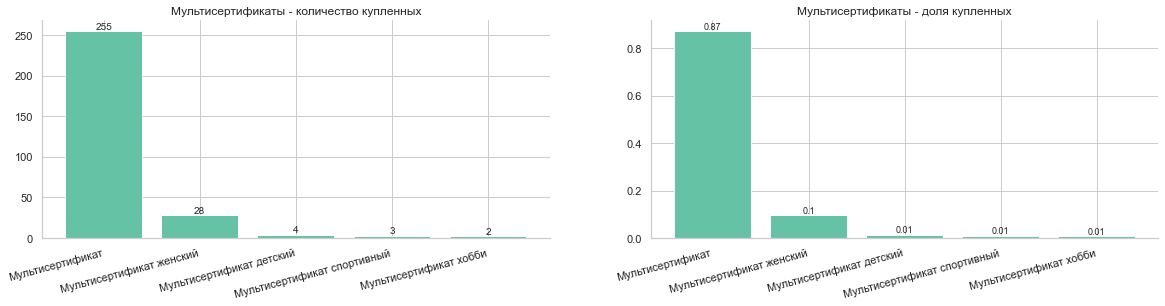

,store,store_count,store_rate
0,Мультисертификат,255,0.87
1,Мультисертификат женский,28,0.10
2,Мультисертификат детский,4,0.01
3,Мультисертификат спортивный,3,0.01
4,Мультисертификат хобби,2,0.01


In [73]:
# таблица
multi_serts = (multi.store.value_counts()
 .to_frame()
 .reset_index()
 .rename(columns={'store':'store_count', 'index':'store'})
 .assign(store_rate = lambda x: x['store_count'] / x['store_count'].sum())
 #.style.format({'store_rate':"{:.2%}"})
)
# multi_serts

# графики matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,4))
     
ax1.bar(multi_serts['store'], multi_serts['store_count'])
ax1.set_xticks(multi_serts['store']) # , size=9, rotation=50, horizontalalignment='center'
ax1.set_xticklabels(multi_serts['store'], rotation=15, horizontalalignment='right') # size=10, horizontalalignment='center'
# ax1.set_xlabel('', size=12)
# ax1.set_ylabel('Количество купленых \n сертификатов', size=12)
ax1.set_title('Мультисертификаты - количество купленных', size=12)
# подписи столбцов
for i in range(len(multi_serts['store'])):
    (ax1.text(i, multi_serts['store_count'][i], 
             multi_serts['store_count'][i], 
              ha = 'center', va = 'bottom', size=10)
    )

ax2.bar(multi_serts['store'], multi_serts['store_rate'])
ax2.set_xticks(multi_serts['store']) # , size=9, rotation=50, horizontalalignment='center'
ax2.set_xticklabels(multi_serts['store'], rotation=15, horizontalalignment='right') # size=10, horizontalalignment='center'
#ax2.set_xlabel('', size=12)
#ax2.set_ylabel('Количество купленых \n сертификатов', size=12)
#  подписи к столбцам
for i in range(len(multi_serts['store_rate'])):
    plt.annotate(str(round(multi_serts['store_rate'], 2)[i]), 
                 xy=(multi_serts['store'][i], 
                    multi_serts['store_rate'][i]), 
                 ha='center', 
                 va='bottom',
                 size=9)
ax2.set_title('Мультисертификаты - доля купленных', size=12)

sns.despine()
plt.show()

multi_serts

Среди мультисертификатов, явным лидером является Универсальный Мультисертификат - его покупают в 87% случаев. На втором месте - Женский мультисертификат - 10%. Детский, Спортивный и Хобби востребованы всего в 1% случаев.

#### Стоимость Мультисертификатов (количество, медиана, среднее, максимум, минимум)

In [74]:
check_multy = (df.query('store.str.contains("Мультисертификат")')[['store', 'order_id', 'price']]
         .groupby('store', as_index=False).agg({'order_id':'count', 'price':['median', 'mean', 'max', 'min']})
        )
check_multy.columns = ['Магазин', 'Количество, шт.', 'Медиана, p.', 'Среднее, p.', 'Максимум, p.', 'Минимум, p.']
check_multy = check_multy.sort_values(by='Медиана, p.', ascending=False)

col = 'Количество, шт.'
title = 'Стоимость Мультисертификатов'
float_col = 'Среднее, p.'
# set_title(check_multy)

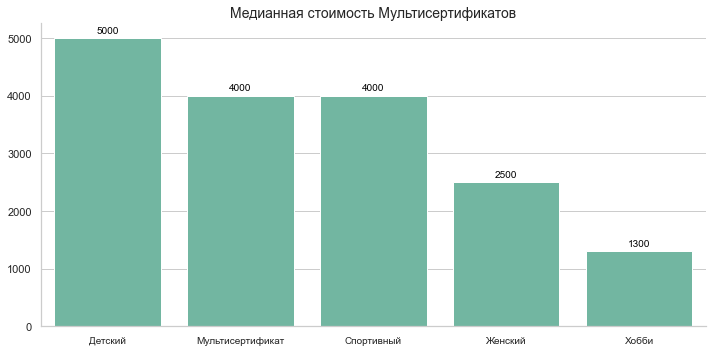

,Магазин,"Количество, шт.","Медиана, p.","Среднее, p.","Максимум, p.","Минимум, p."
0,Мультисертификат,255,4000,"6,960.00",130000,500
1,Мультисертификат женский,28,2500,"3,357.14",15000,500
2,Мультисертификат детский,4,5000,"7,250.00",15000,4000
3,Мультисертификат спортивный,3,4000,"5,259.00",8777,3000
4,Мультисертификат хобби,2,1300,"1,300.00",1600,1000


In [75]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=check_multy, x=check_multy['Магазин'], y=check_multy['Медиана, p.'], color='#66C2A5', ax=ax) # color='lightgreen'
ax.set_xlabel('', size=10)
ax.set_xticklabels(['Детский', 'Мультисертификат', 'Спортивный', 'Женский', 'Хобби'], size=10, rotation=0, horizontalalignment='center') #  horizontalalignment='right'
ax.set_ylabel('', size=10)
ax.bar_label(ax.containers[0], padding=3, label_type='edge', color='black', rotation=0)
ax.set_title('Медианная стоимость Мультисертификатов', size=14)
plt.tight_layout()
sns.despine()
plt.show()

print()
set_title(check_multy)

Самые высокие медианные значения номиналов - у Детских мультисертификатов - 5 000 р.<br>
Самые низкие цены - у Хобби - 1300 р.

#### Номиналы мультисертификатов (подробнее)

Посмотрим, разброс цен и узнаем, какие номиналы выбирают для мультисертификатов чаще.

In [76]:
multi.head()

,card_id,order_id,user_id,price,payment_date,receipt_date,store,buyers_email,recipients_email,payment_dt,payment_dt_month,day_name,weekday,stores_cat
0,1,100,343,4000,2022-08-01 12:00:35,2022-08-01 12:01:03,Мультисертификат,qWRdaqdWE001@mail.ru,cdKH125adsjkld585@mail.ru,2022-08-01,2022-08,Monday,0,Мультисертификаты
1,2,200,457,4000,2022-08-01 12:02:23,2022-08-01 12:03:02,Мультисертификат детский,qWRdaqdWE002@yandex.ru,cdKH125adsjkld1042@yandex.ru,2022-08-01,2022-08,Monday,0,Мультисертификаты
7,8,800,507,4000,2022-08-01 23:51:04,2022-08-02 10:00:04,Мультисертификат,qWRdaqdWE008@rambler.ru,cdKH125adsjkld957@yandex.ru,2022-08-01,2022-08,Monday,0,Мультисертификаты
10,11,1100,650,6000,2022-08-02 10:18:30,2022-08-02 10:20:02,Мультисертификат,qWRdaqdWE011@gmail.com,cdKH125adsjkld145@gmail.com,2022-08-02,2022-08,Tuesday,1,Мультисертификаты
13,14,1400,110,4000,2022-08-02 13:42:15,2022-08-02 13:44:02,Мультисертификат,qWRdaqdWE014@mail.ru,cdKH125adsjkld589@mail.ru,2022-08-02,2022-08,Tuesday,1,Мультисертификаты


In [77]:
multi['store'].value_counts().index

Index(['Мультисертификат', 'Мультисертификат женский',
       'Мультисертификат детский', 'Мультисертификат спортивный',
       'Мультисертификат хобби'],
      dtype='object')

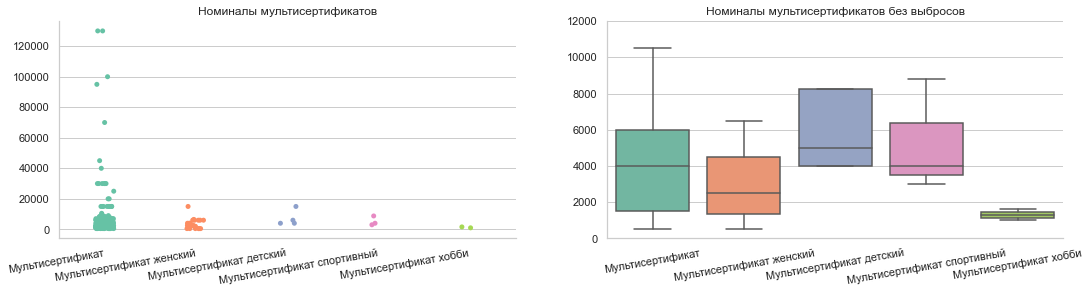

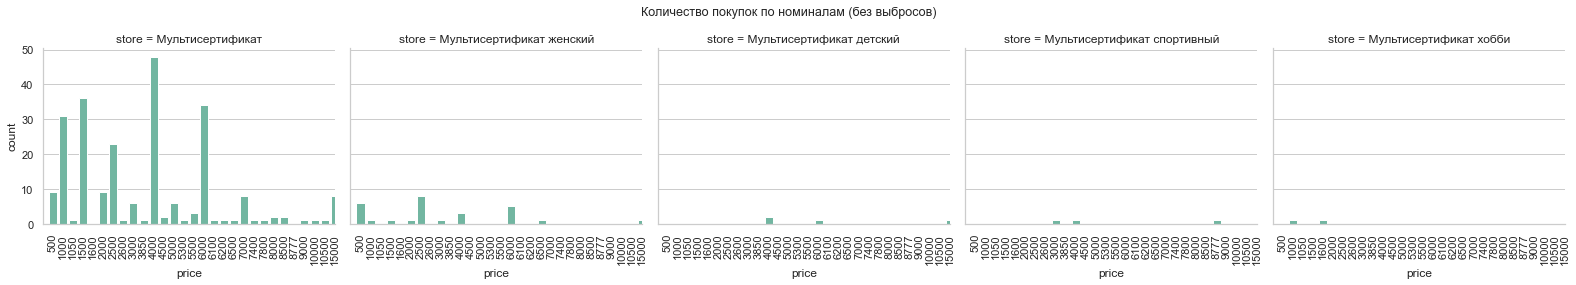


Статистики по мультисертификатам


store,Мультисертификат,Мультисертификат женский,Мультисертификат детский,Мультисертификат спортивный,Мультисертификат хобби
count,255.00,28.00,4.00,3.00,2.00
mean,"6,960.00","3,357.14","7,250.00","5,259.00","1,300.00"
std,"15,558.33","3,027.21","5,251.98","3,087.43",424.26
min,500.00,500.00,"4,000.00","3,000.00","1,000.00"
25%,"1,500.00","1,375.00","4,000.00","3,500.00","1,150.00"
50%,"4,000.00","2,500.00","5,000.00","4,000.00","1,300.00"
75%,"6,000.00","4,500.00","8,250.00","6,388.50","1,450.00"
max,"130,000.00","15,000.00","15,000.00","8,777.00","1,600.00"


In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4))

# графики seaborn
sns.stripplot(data=multi, x='store', y='price', ax=ax1, order=multi['store'].value_counts().index) #catplot height=4, aspect=3, 
ax1.set_xticklabels(multi['store'].value_counts().index, rotation=10, horizontalalignment='right')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Номиналы мультисертификатов')

sns.boxplot(data=multi, x='store', y='price', ax=ax2, order=multi['store'].value_counts().index)
ax2.set_ylim(0, 12000)
ax2.set_xticklabels(multi['store'].value_counts().index, rotation=10)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Номиналы мультисертификатов без выбросов')
sns.despine()
plt.show()

# print()
# (sns.displot(data=multi, x='price', col='store',  col_order=multi['store'].value_counts().index, height=4, aspect=1, bins=300)
#  .set_axis_labels("Номинал", "Количество покупок")
# ) #binrange=(0, 12000)
# plt.xlim((0, 12000))
# plt.suptitle('Распределение номиналов (без выбросов)')
# plt.tight_layout()
# plt.show()

print()
#fig, ax = plt.subplots(figsize=(15, 4))
(sns.catplot(data=multi, x='price', col='store', kind='count', col_order=multi['store'].value_counts().index, height=4, aspect=1.1, color='#66C2A5')
 .set_xticklabels(rotation=90)
 .set(xlim=(-1, 28)) #kind='scatter', binrange=(0, 12000)
)
plt.suptitle('Количество покупок по номиналам (без выбросов)', size=12.5)
#.set_axis_labels("", "Survival Rate")
#.set_xticklabels(["Men", "Women", "Children"])
#.set_titles("{col_name} {col_var}")
#.set(ylim=(0, 1))
#.despine(left=True)
#plt.xlim(0, 120000) 
plt.tight_layout()
plt.show()

print()
print('Статистики по мультисертификатам')
(multi.pivot(columns='store', values='price').describe().sort_index(axis=1, level='count')
 [['Мультисертификат', 'Мультисертификат женский', 'Мультисертификат детский', 'Мультисертификат спортивный','Мультисертификат хобби']]
)

Универсальным сертификатам характерны аномальные значения номиналов: выбранная цена карты может составлять 40 000 р., 70 000 р. и даже 120 000 р. Номиналы тематических мультисертификатов не превышают 20 000 р. <br>
Наиболее популярные номиналы Универсального Мультисертификата - 4000 р, 1500 р., 6000 р., 1500 р., 1000 р. и 2500р. Мультисертификата для женщин - 2500 р., 500 р. и 6000 р.
Самые высокие средние и медианные значения номиналов - у Детских мультисертификатов - 7 250 р. и 5 000 р. соответственно. Но такие сертификаты покупают редко - всего 4 проданные карты.<br>
Самые низкие цены - у Хобби - по 1300 р. и таких карт было куплено всего 2.

### Email

In [79]:
df['mail'] = df['recipients_email'].str.split('@', expand=True)[1]
df.head()

,card_id,order_id,user_id,price,payment_date,receipt_date,store,buyers_email,recipients_email,payment_dt,payment_dt_month,day_name,weekday,stores_cat,mail
0,1,100,343,4000,2022-08-01 12:00:35,2022-08-01 12:01:03,Мультисертификат,qWRdaqdWE001@mail.ru,cdKH125adsjkld585@mail.ru,2022-08-01,2022-08,Monday,0,Мультисертификаты,mail.ru
1,2,200,457,4000,2022-08-01 12:02:23,2022-08-01 12:03:02,Мультисертификат детский,qWRdaqdWE002@yandex.ru,cdKH125adsjkld1042@yandex.ru,2022-08-01,2022-08,Monday,0,Мультисертификаты,yandex.ru
2,3,300,281,6000,2022-08-01 12:34:38,2022-08-01 13:01:03,Тайский массаж,qWRdaqdWE003@gmail.com,cdKH125adsjkld142@gmail.com,2022-08-01,2022-08,Monday,0,Другие,gmail.com
3,4,400,760,4000,2022-08-01 15:10:45,2022-08-01 15:11:02,Детский Мир,qWRdaqdWE004@gmail.com,cdKH125adsjkld143@bk.ru,2022-08-01,2022-08,Monday,0,Детский Мир,bk.ru
4,5,500,684,6000,2022-08-01 15:21:43,2022-08-01 15:23:02,Детский Мир,qWRdaqdWE005@gmail.com,cdKH125adsjkld144@mail.ru,2022-08-01,2022-08,Monday,0,Детский Мир,mail.ru


In [80]:
df['mail'].nunique()

176

In [81]:
df['mail'].value_counts()

mail.ru       356
yandex.ru     268
gmail.com     215
bk.ru          32
rambler.ru     22
             ... 
stenn.com       1
hel.ru          1
bftan.ru        1
vb.ru           1
lib.ru          1
Name: mail, Length: 176, dtype: int64

In [82]:
df['mail'].unique()

array(['mail.ru', 'yandex.ru', 'gmail.com', 'bk.ru', 'cen.com', 'jt.com',
       'ru.est.com', 'sys.ru', 'strelka.com', 'alf.ru', 'bearing.ru',
       'eff.com', 'icloud.com', 'list.ru', 'rambler.ru', 'ya.ru',
       'dxgl.ru', 'ges.ru', 'bpry.ru', 'ond.me', 'cchell.com', 'mo.com',
       'mer.com', 'guspb.ru', 'lib.ru', 'royalc.com', 'peps.com',
       'meme.com', 'zaka.ru', 'interm.net', 'evr.com', 'brux.ru',
       'boesc.com', 'cor.ru', 'u4b.ru', 'servr.com', 'crocu.com',
       'uni-plat.ru', 'inbox.ru', 'royalccom', 'mt.ru', 'put.com',
       'pgru.com', 'nipi.ru', 't-sys.com', '777gis.ru', 'Renl.com',
       'rtl.ru', 'rivers.ru', 'zdros.ru', 'pwcre.com', 'aog.ru',
       '354zzz.ru', 'vez.ru', 'IS.RU', 'kel.ru', 'bb.ru', 'cchel.com',
       'kdv.ru', 'leon.ru', 'gp.spb.ru', 'live.com', 'nok.com',
       'story.ru', 'karap.ru', 'gmail.ru', 'digi.ru', 'bftan.ru',
       'upe.ru', 'atar.com', 'matate.ru', 'mkc.ru', 'stenn.com',
       'noble.ru', 'abb.com', 'yahoo.uk', 'asd.ru', '

In [83]:
# top_mail = df['mail'].value_counts().head(5).index.to_list()
# top_mail
top_mail = (['mail.ru', 'yandex.ru', 'gmail.com', 'bk.ru', 'icloud.com', 'list.ru', 'rambler.ru', 
             'ya.ru', 'inbox.ru', 'yahoo.uk', 'hotmail.com', 'yahoo.com', 'aport.spb.ru', 'yandex.com']
           )

In [84]:
def get_mail_cat(x):
    if x not in top_mail:
        x = 'other'
    else:
        x = x
    return x

In [85]:
df_mail = ( df.groupby('mail', as_index=False).agg(mail_count = ('mail', 'count'))
 .sort_values(by='mail_count', ascending=False)
 .reset_index(drop=True)
 .assign(mail_ratio = lambda x: x['mail_count'] / x['mail_count'].sum())
 .assign(mail_cat = lambda x: x['mail'].apply(get_mail_cat))
 .assign(zone = lambda x: x['mail'].str.split('.', expand=True)[1].str.lower())
)
df_mail.head(5)

,mail,mail_count,mail_ratio,mail_cat,zone
0,mail.ru,356,0.28,mail.ru,ru
1,yandex.ru,268,0.21,yandex.ru,ru
2,gmail.com,215,0.17,gmail.com,com
3,bk.ru,32,0.03,bk.ru,ru
4,rambler.ru,22,0.02,rambler.ru,ru


In [86]:
df_mail_cat = (df_mail.groupby('mail_cat', as_index=False).agg(count_cat = ('mail_count', 'sum'), cat_ratio = ('mail_ratio', 'sum'))
               .sort_values(by='count_cat', ascending=False)
               .reset_index(drop=True)
              )  
# df_mail_cat

df_mail_zone =( df_mail.groupby('zone', as_index=False).agg(zone_count = ('zone', 'count'))
 .assign(zone_ratio = lambda x: x['zone_count'] / x['zone_count'].sum())
 .sort_values(by='zone_count', ascending=False)
 .reset_index(drop=True)               
)
# df_mail_zone

In [87]:
df_mail_cat

,mail_cat,count_cat,cat_ratio
0,mail.ru,356,0.28
1,other,315,0.25
2,yandex.ru,268,0.21
3,gmail.com,215,0.17
4,bk.ru,32,0.03
5,rambler.ru,22,0.02
6,list.ru,17,0.01
7,icloud.com,16,0.01
8,inbox.ru,12,0.01
9,ya.ru,8,0.01


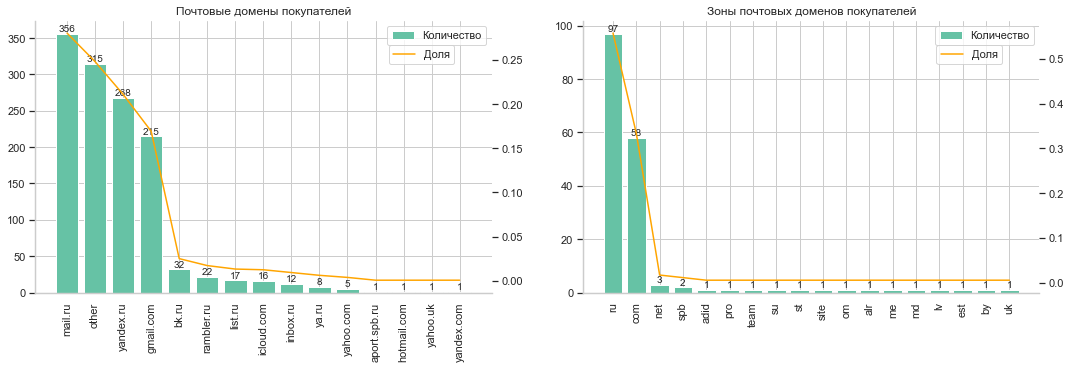

,mail_cat,count_cat,cat_ratio
0,mail.ru,356,0.28
1,other,315,0.25
2,yandex.ru,268,0.21
3,gmail.com,215,0.17
4,bk.ru,32,0.03
,zone,zone_count,zone_ratio
0,ru,97,0.56
1,com,58,0.33
2,net,3,0.02
3,spb,2,0.01


In [88]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

# matplotlib грфик 1 - домены
ax1.bar(df_mail_cat['mail_cat'], df_mail_cat['count_cat'], label='Количество')
ax1.set_xticks(df_mail_cat['mail_cat'])
ax1.set_xticklabels(df_mail_cat['mail_cat'], rotation=90)
ax1.set_title('Почтовые домены покупателей')
ax1.legend()
#  подписи к столбцам
for i in range(len(df_mail_cat['mail_cat'])):
    ax1.text(i, df_mail_cat['count_cat'][i], df_mail_cat['count_cat'][i], ha='center', va='bottom', size=10) #ha='center', va='bottom',

ax3 = ax1.twinx()
ax3.plot(df_mail_cat['mail_cat'], df_mail_cat['cat_ratio'], color='orange', label='Доля')
ax3.grid(False)
ax3.legend(bbox_to_anchor=(0.93, 0.93))

# matplotlib грфик 2 - зоны
ax2.bar(df_mail_zone['zone'], df_mail_zone['zone_count'], label='Количество')
ax2.set_xticks(df_mail_zone['zone'])
ax2.set_xticklabels(df_mail_zone['zone'], rotation=90)
ax2.set_title('Зоны почтовых доменов покупателей')
ax2.legend()
#  подписи к столбцам
for i in range(len(df_mail_zone['zone'])):
    ax2.text(i, df_mail_zone['zone_count'][i], df_mail_zone['zone_count'][i], ha='center', va='bottom', size=10) #ha='center', va='bottom',

ax4 = ax2.twinx()
ax4.plot(df_mail_zone['zone'], df_mail_zone['zone_ratio'], color='orange', label='Доля')
ax4.grid(False)
ax4.legend(bbox_to_anchor=(0.93, 0.93))

sns.despine()
plt.show()

# таблицы
#df_mail_cat
#df_mail_zone

df_mail_cat_styler = (df_mail_cat.head(5) #.sort_values(by='payment_dt')
                     .style.set_table_attributes("style='display:inline'")
                     .set_caption('Почтовые домены (топ-5)')
                     .format({'payment_dt': "{:%Y-%m-%d}"}) # формат дат
                     .format({'cat_ratio': "{:,.2f}"})
                    )
df_mail_zone_styler = df_mail_zone.head(5).style.set_table_attributes("style='display:inline'").set_caption('Зоны почтовых адресов (топ-5)').format({'zone_ratio': "{:,.2f}"})
space = "\xa0" * 120
display_html(df_mail_cat_styler._repr_html_() + space + df_mail_zone_styler._repr_html_(), raw=True)

Больше всего покупателей обладают почтой mail.ru - 28%.<br>
Второй по популярности почтовый домен - yandex.ru - 0,21%<br>
На третьем месте - gmail.com - 17%.<br>
25% - это, в основном, корпоративные почты.<br>
Остальные 9% - менее популярные почтовые сервисы (bk.ru, rambler.ru, list.ru, icloud.com, inbox.ru и др.).<br><br>

56% почтовых адресов в зоне .ru.<br>
33% почтовых адресов в зоне .com.<br>
Остальные 9% малопопулярные зоны - .net, .pro, .team.ru, .su и т.д.<br>

## Выводы

Данные предоставлены за **3 месяца - август-октябрь**.<br>
**Выручка** - 5 390 333 р. Медианная выручка в день - 43 500 р., в месяц - 1 684 367 р. Наиболее прибыльный месяц - август (2 076 498 р.), наименее - сентябрь (1 629 468).<br>
**Количество уникальных покупателей** - 769. Среднее количество покупателей в день - 10, в месяц - 266. Наибольшее количество покупателей (302) было в сентябре, наименьшее (210) - в октябре. <br>
**Количество покупок** - 1 270. Среднее количество заказов в день - 15, в месяц - 423. Наибольшее количество заказов наблюдается в сентябре - 479, наименьшее - в октябре - 367. <br>
**Дни недели** - больше всего покупателей и покупок - по средам. Меньше всего покупают по вторникам.<br>
Не смотря на то, что больше всего покупателей и заказов было в сентябре, этот месяц является наименее прибыльным. Это связано со снижением среднего чека в сентябре (3 402 р.), по сравнению с августом (4 898 р.) и октябрем (4 589 р.). В сентябре, 50% покупателей не оформляли карты дороже 2000 р.<br>

**Средняя стоимость покупки** - 4 244 р. Наибольшее значение - в августе (4 897 р.), наименьшее - в сентябре (3 402 р.)<br>
**Медианная стоимость покупки** - 2 500 р. Наибольшее значение - в августе и октябре (по 2 500 р.), наименьшее - в сентябре (2 000 р.). Из-за аномально дорогих единичных заказов, медианная цена меньше средней.<br>
**Минимальная стоимость покупки** - 500 р.<br>
**Максимальная стоимость покупки** - 130 000 р.<br>

75% покупателей выбирают номиналы не более - 4000 р.<br>
90% покупателей выбирают номиналы не более - 6 000 р.<br>
95% покупателей выбирают номиналы не более - 15 000 р.<br>
99% покупателей выбирают номиналы не более - 30 000 р.<br>
Покупки более 30 000 р. можно считать выбросами.<br><br>

**Повторные покупки**<br>
Среднее количество заказов на одного пользователя (F = Количество покупок / Число уникальных покупателей) - 1,65.<br>
Доля пользователей, совершивших более 1 покупки в месяц - 10-18% (или 29-40 покупателей), в зависимости от месяца.<br>
Подавляющее большинство покупателей (> 80%) покупают по 1 сертификату в месяц.<br>
Около 7% покупателей берут по 2 сертификата в месяц.<br>
2-3% - покупают 3 и более сертификатов в месяц.<br>
Также встречаются отдельные оптовые покупатели, которые оформляют по 10-12, 16-24 и даже по 31-50 сертификатов в месяц.<br><br>


**Магазины**<br>
Пользователи покупали сертификаты 49 магазинов, включая Мультисертификат.<br>
Топ-5 востребованных магазинов:
1. Детский Мир                   (22%)
2. Мультисертификат              (20%)
3. Перекресток                   (13%)
4. Рив Гош                       (12%)
5. Улыбка Радуги                 (10%)
6. Остальные магазины (23%) - в отдельности каждый из них составляет <= 3%.<br>

Если объединить все мультисертификаты (универсальный, детский, женский, спортивный, хобби) в единую категорию "Мультисертификаты", их доля возрастает с 20% до 23%, и они выходят на 1-ю позицию в топ-5 магазинов. В совокупности они приносят больше всего продаж.<br>

Наиболее высокий медианный чек из топ-5 магазинов, характерен Мультисертификатам (все) и категории "Другие"  - 4 000 р.
Наименьший - 1 000 р. - Перекрестку.<br><br>

**Категория "Другие"**<br>
В категории "Другие", самый высокий медианный чек у СПА, при этом, был куплен только один сертификат этого магазина.<br>
Холодильник.ру - куплено 4 сертификата, медианная цена - 22 500 р.<br>
Салон красоты - куплен 1 сертификат, медианная цена - 20 000 р.<br>
Самый частопокупаемый магазин из категории "Другие" - Триал-спорт - куплено 33 сертификата, медианная цена - 6000 р.<br><br>

**Мультисертификаты**<br>
Среди мультисертификатов, явным лидером является Универсальный Мультисертификат - его покупают в 87% случаев. На втором месте - Женский мультисертификат - 10%. Детский, Спортивный и Хобби востребованы всего в 1% случаев.<br>
Универсальным сертификатам характерны аномальные значения номиналов: выбранная цена карты может составлять 40 000 р., 70 000 р. и даже 120 000 р. Номиналы тематических мультисертификатов не превышают 20 000 р.<br>
Наиболее популярные номиналы Универсального Мультисертификата - 4000 р, 1500 р., 6000 р., 1500 р., 1000 р. и 2500р. Мультисертификата для женщин - 2500 р., 500 р. и 6000 р. Самые высокие средние и медианные значения номиналов - у Детских мультисертификатов - 7 250 р. и 5 000 р. соответственно. Но такие сертификаты покупают редко - всего 4 проданные карты.<br>
Самые низкие цены - у Хобби - по 1300 р. Но данные по Хобби не показательны т.к. таких карт было куплено всего 2.
<br>

**Почтовые домены**
Больше всего покупателей обладают почтой mail.ru - 28%.<br>
Второй по популярности почтовый домен - yandex.ru - 21%<br>
На третьем месте - gmail.com - 17%.<br>
25% - в основном, корпоративные почты.<br>
Остальные 9% - менее популярные почтовые сервисы (bk.ru, rambler.ru, list.ru, icloud.com, inbox.ru и др.).<br><br>

56% почтовых адресов в зоне .ru.<br>
33% почтовых адресов в зоне .com.<br>
Остальные 9% малопопулярные зоны - .net, .pro, .team.ru, .su и т.д.<br>